In [1]:
# only adjust settings in this cell
state = 'IA'
root_name = 'Polk'     # which county will root our district (or county_cluster==multi-district)?
k = 4                  # the state has this number of districts
deviation = 1          # use: L=ideal_population-deviation, U=ideal_population-deviation
size = 1               # size=1 for single district, size=2 for double district, ...
obj_type = 'cut_edges' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.json'

from cluster import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
G._size = size

print("State has total of k =",G._k,"districts")
print("We seek a multi-district (county cluster) of size =",G._size)

State has total of k = 4 districts
We seek a multi-district (county cluster) of size = 1


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 797592
Single district upper population limit U = 797593


In [5]:
# Require this county be in our district/county_cluster/multi_district
G._root = G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Polk County to be the root. In our graph, this is vertex # 8


In [6]:
from cluster import enumerate_top_districts
first_districts = enumerate_top_districts( G, obj_type=obj_type, enumeration_limit=10 )

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-11
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 745 rows, 865 columns and 3665 nonzeros
Model fingerprint: 0x0e84edb4
Variable types: 445 continuous, 420 integer (420 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+06]
Presolve removed 109 rows and 109 columns
Presolve time: 0.01s
Presolved: 636 rows, 756 columns, 3002 nonzeros
Variable types: 436 continuous, 320 integer (320 binary)

Root relaxation: objective 5.547523e+00, 176 iterations, 0.01 seconds (0.00 work units)

 413874 180770 infeasible   54               -   21.16645      -  31.2  300s
 419507 182627   24.95509   33   96          -   21.19040      -  31.2  305s
 426216 184922   29.04387   37   68          -   21.21869      -  31.1  310s
 432339 187019   30.91191   35   65          -   21.24340      -  31.0  315s
 439881 189547 infeasible   50               -   21.27425      -  31.0  320s
 447672 192460   28.42143   49   39          -   21.30784      -  30.9  325s
 455626 194864   25.11192   43   81          -   21.34236      -  30.9  330s
 461671 197232   24.66516   48   26          -   21.37076      -  30.8  335s
 470051 199833   23.45378   37    4          -   21.40300      -  30.8  340s
found [8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96] with objective = 24.0
   replaced worse solution with objective = 31.0
adding cut saying that objective should be less than 31.0
 476370 201819   27.29787   41   47          -   21.43336      -  30.7  345s
 483525 204147   29.09902   42   72          - 

 1058285 374996   26.32340   46   63          -   23.40591      -  27.9  770s
 1070132 376294   24.84756   48   15          -   23.45373      -  27.9  775s
found [0, 4, 8, 17, 43, 66, 73, 81, 93] with objective = 26.0
   replaced worse solution with objective = 27.0
adding cut saying that objective should be less than 27.0
 1083135 377584 infeasible   56               -   23.51127      -  27.9  780s
found [8, 14, 17, 37, 43, 53, 62, 66, 68, 73, 78, 79, 93] with objective = 25.0
   replaced worse solution with objective = 27.0
adding cut saying that objective should be less than 27.0
 1095508 378770   24.40717   41   60          -   23.56878      -  27.8  785s
 1110472 380563   25.47744   40    9          -   23.63731      -  27.8  790s
 1125302 382705 infeasible   52               -   23.70851      -  27.7  795s
 1139437 384463   25.10447   40   15          -   23.77666      -  27.7  800s
found [2, 3, 8, 21, 38, 41, 46, 48, 53, 54, 60, 67, 68, 71, 76, 78, 79, 86, 94, 95, 96] with objec

In no particular order, the top 10 clusters are:


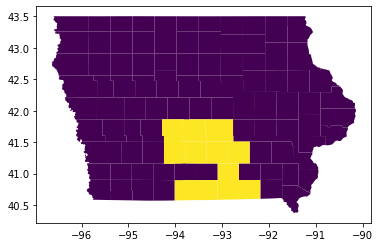

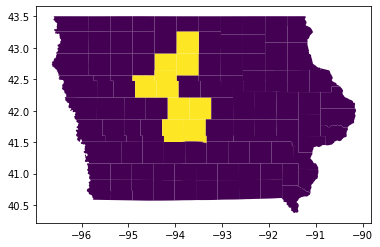

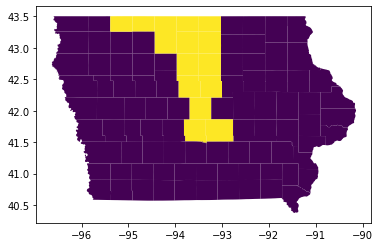

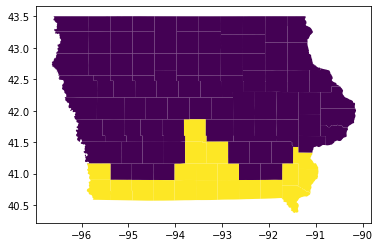

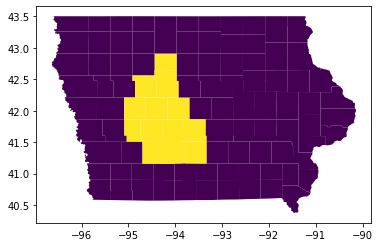

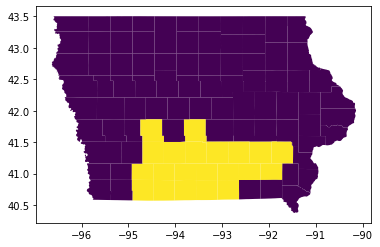

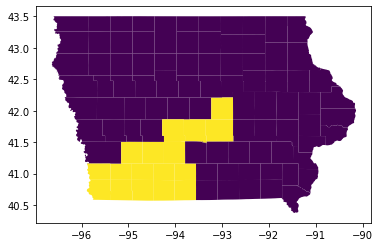

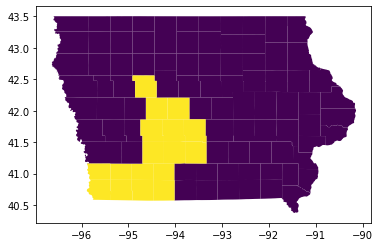

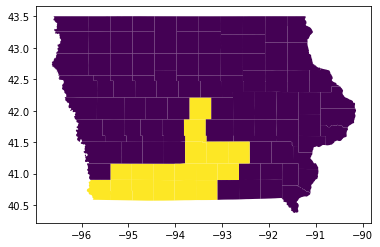

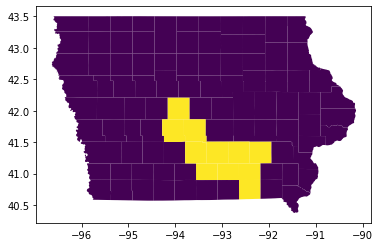

In [7]:
# Draw the first districts
from cluster import draw_single_district
filename = state + '_county.shp'

print("In no particular order, the top",len(first_districts),"clusters are:")
for first_district in first_districts:
    draw_single_district( filepath, filename, G, first_district, zoom=False )

Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 632 rows, 721 columns and 3055 nonzeros
Model fingerprint: 0x2b31e1ef
Variable types: 365 continuous, 356 integer (356 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+06]
Presolve removed 106 rows and 98 columns
Presolve time: 0.01s
Presolved: 526 rows, 623 columns, 2375 nonzeros
Variable types: 357 continuous, 266 integer (266 binary)

Root relaxation: objective 4.425991e+00, 185 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  O

 1075168 485221   23.14492   43    5          -   20.54409      -  22.5  250s
 1099785 496007   24.00599   26   37          -   20.60166      -  22.5  255s
 1124377 506222   20.70486   48   23          -   20.66987      -  22.4  260s
 1148548 516198   27.49627   52   22          -   20.73627      -  22.4  265s
 1173800 527381   25.78795   47   19          -   20.80984      -  22.3  270s
 1198662 538030   44.02789   36   57          -   20.89274      -  22.2  275s
 1224818 548533 infeasible   49               -   20.97688      -  22.1  280s
 1252019 560299   21.22533   45   54          -   21.00000      -  22.0  285s
 1272105 570558   25.41914   33    4          -   21.00000      -  22.1  290s
 1296527 580995 infeasible   51               -   21.04998      -  22.0  295s
 1320541 590870 infeasible   50               -   21.09137      -  22.0  300s
 1341408 600154   23.46209   33   44          -   21.12540      -  22.0  305s
 1364609 609711   29.66016   50   12          -   21.15813      

 3442749 1480239   29.00238   44   10          -   23.28538      -  19.9  740s
 3465269 1489609 infeasible   45               -   23.29872      -  19.9  745s
found [0, 11, 13, 15, 25, 29, 43, 50, 51, 56, 61, 63, 72, 77, 82, 85, 87, 88, 90] with objective = 32.0
   added to list!
 3488457 1499402   39.35944   44   37          -   23.31302      -  19.9  750s
 3512150 1508435   39.90601   40   33          -   23.32720      -  19.9  755s
 3536327 1518774   30.17108   50   33          -   23.34137      -  19.9  760s
 3561182 1528786   35.26720   48   26          -   23.35714      -  19.9  765s
 3587146 1539412   32.27238   59   15          -   23.37328      -  19.9  770s
 3610958 1549317   24.30645   46    4          -   23.38737      -  19.9  775s
 3635570 1559800   37.33239   41   41          -   23.40261      -  19.8  780s
 3660434 1569875   31.15451   39  102          -   23.41816      -  19.8  785s
 3684321 1579439   26.03175   44    6          -   23.43266      -  19.8  790s
 3710077 

 5732706 2413831 infeasible   41               -   24.49722      -  19.0 1215s
 5757868 2424326 infeasible   46               -   24.50797      -  19.0 1220s
 5780898 2433237 infeasible   53               -   24.51782      -  19.0 1225s
 5801662 2441791   45.01190   56   13          -   24.52710      -  19.0 1230s
found [5, 7, 11, 13, 30, 33, 36, 43, 51, 56, 57, 62, 63, 64, 69, 70, 73, 74, 75, 77, 80, 82, 88, 89, 90] with objective = 40.0
   added to list!
adding cut saying that objective should be less than 52.0
 5823331 2450541   44.46048   40   49          -   24.53804      -  19.0 1235s
 5845817 2458859   28.93642   33   36          -   24.54831      -  19.0 1240s
 5868002 2467513 infeasible   42               -   24.55956      -  19.0 1245s
 5889527 2476346   26.00156   32   38          -   24.57011      -  19.0 1250s
 5909173 2483995   28.06751   49   18          -   24.57934      -  19.0 1255s
 5930331 2492043   32.53660   48   30          -   24.58963      -  19.0 1260s
 595203

 7367937 3015767   33.72791   40   52          -   25.24842      -  18.7 1635s
 7384170 3020940   34.92543   46   22          -   25.25543      -  18.7 1640s
 7401432 3026303   27.31602   47   11          -   25.26204      -  18.7 1645s
 7417821 3031476   25.53341   58   40          -   25.26917      -  18.7 1650s
 7435791 3037140   31.71739   36   25          -   25.27648      -  18.7 1655s
 7453485 3042445   33.24022   48   16          -   25.28395      -  18.7 1660s
 7471648 3048282   28.40930   57    9          -   25.29123      -  18.7 1665s
found [0, 5, 6, 7, 11, 13, 15, 19, 29, 30, 32, 34, 35, 40, 55, 56, 57, 61, 64, 69, 72, 74, 77, 80, 81, 82, 87, 88, 89, 90] with objective = 35.0
   replaced worse solution with objective = 36.0
adding cut saying that objective should be less than 35.0
 7488006 3053054 infeasible   39               -   25.29887      -  18.7 1670s
 7505815 3057861   29.08040   57   16          -   25.30666      -  18.7 1675s
 7523185 3062976   27.19256   52    6

 8687844 3340882   29.09958   42   73          -   26.00000      -  18.5 2075s
 8699969 3342509   27.21867   45   37          -   26.01073      -  18.5 2080s
 8711332 3343767   28.35249   36    5          -   26.01934      -  18.5 2085s
 8723725 3345412   29.43594   51   43          -   26.02887      -  18.5 2090s
 8735624 3346404   29.84516   37   99          -   26.03853      -  18.5 2095s
 8748244 3347715 infeasible   45               -   26.04854      -  18.5 2100s
 8761269 3348839 infeasible   48               -   26.05884      -  18.5 2105s
 8773649 3349875 infeasible   58               -   26.06794      -  18.5 2110s
 8784563 3351015 infeasible   58               -   26.07543      -  18.5 2115s
 8797129 3352112 infeasible   47               -   26.08479      -  18.5 2120s
 8809199 3353061 infeasible   52               -   26.09412      -  18.5 2125s
 8821988 3353917 infeasible   48               -   26.10333      -  18.5 2130s
 8835241 3354885   28.81861   52    6          -   2

 9880610 3387091   28.05315   52   11          -   26.99017      -  18.4 2530s
 9894042 3387344 infeasible   55               -   27.00000      -  18.4 2535s
 9907962 3388491   27.72774   45    4          -   27.00000      -  18.4 2540s
 9921096 3391364 infeasible   50               -   27.00000      -  18.4 2545s
 9935695 3395107   27.44588   54    9          -   27.00000      -  18.4 2550s
 9949831 3398048 infeasible   55               -   27.00000      -  18.4 2555s
 9961884 3400132   28.00424   48   11          -   27.00000      -  18.4 2560s
 9976541 3402523   28.17836   34   81          -   27.00000      -  18.3 2565s
 9987894 3403979 infeasible   55               -   27.00000      -  18.3 2570s
 10002379 3407151   27.00124   42   20          -   27.00000      -  18.3 2575s
 10015711 3409142   28.44646   42   77          -   27.00000      -  18.3 2580s
 10027132 3411090 infeasible   46               -   27.00000      -  18.3 2585s
 10039029 3412573   27.69934   51    6          -

Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 472 rows, 515 columns and 2203 nonzeros
Model fingerprint: 0xfba0c36c
Variable types: 253 continuous, 262 integer (262 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 108 rows and 82 columns
Presolve time: 0.01s
Presolved: 364 rows, 433 columns, 1620 nonzeros
Variable types: 248 continuous, 185 integer (185 binary)

Root relaxation: objective 1.390416e+00, 298 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   

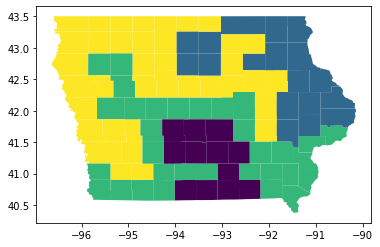

In [8]:
# code to find just one plan
from cluster import draw_plan
found = False

for first_district in first_districts:
    
    if found:
        break
    
    nondistrict = [ i for i in G.nodes if i not in first_district ]
    G2 = G.subgraph(nondistrict)
    G2._root = None
    G2._size = 1
    G2._k = 3
    G2._L = G._L
    G2._U = G._U
    second_districts = enumerate_top_districts( G2, obj_type=obj_type, enumeration_limit=10 )
    
    for second_district in second_districts:
        
        if found:
            break

        nondistrict2 = [ i for i in G.nodes if i not in first_district+second_district ]
        G3 = G.subgraph(nondistrict2)
        G3._root = None
        G3._size = 1
        G3._k = 2
        G3._L = G._L
        G3._U = G._U
        third_districts = enumerate_top_districts( G3, obj_type=obj_type, enumeration_limit=1 )

        for third_district in third_districts:

            fourth_district = [ i for i in G.nodes if i not in first_district+second_district+third_district ]
            plan = [ first_district, second_district, third_district, fourth_district ]
            draw_plan( filepath, filename, G, plan )
            found = True    

Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 632 rows, 721 columns and 3055 nonzeros
Model fingerprint: 0x2b31e1ef
Variable types: 365 continuous, 356 integer (356 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+06]
Presolve removed 106 rows and 98 columns
Presolve time: 0.01s
Presolved: 526 rows, 623 columns, 2375 nonzeros
Variable types: 357 continuous, 266 integer (266 binary)

Root relaxation: objective 4.425991e+00, 185 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  O

 551238 258698   35.41512   41   29          -   19.05484      -  24.0  255s
 562951 264142   41.67017   58   12          -   19.10033      -  24.0  260s
 574994 269257   27.64621   34   71          -   19.13838      -  24.0  265s
 587153 274179   26.75291   47    6          -   19.18068      -  23.9  270s
 599237 279805   26.09607   51   22          -   19.21348      -  23.9  275s
 609294 283664 infeasible   35               -   19.24304      -  23.8  280s
 619122 287884   27.23734   29   80          -   19.27344      -  23.8  285s
 628380 291869   33.64834   39   25          -   19.30392      -  23.8  290s
 638013 296137   27.04998   46    4          -   19.33156      -  23.8  295s
 649208 301380   25.24801   35   63          -   19.36775      -  23.7  300s
 661445 306513   37.41422   60    7          -   19.40865      -  23.7  305s
 670098 310007   28.57788   40   23          -   19.43882      -  23.6  310s
 678088 313267 infeasible   40               -   19.46633      -  23.6  315s

found [0, 5, 7, 11, 15, 36, 50, 51, 56, 61, 69, 72, 77, 81, 82, 87, 88, 90, 98] with objective = 28.0
   added to list!
 1755503 774092   25.27926   43   38          -   21.75273      -  21.4  785s
 1777944 783070   40.13508   65    9          -   21.79390      -  21.4  790s
 1799738 792246   32.50000   34   58          -   21.83855      -  21.3  795s
 1824762 803476   38.49348   38   53          -   21.89016      -  21.3  800s
 1850128 814042 infeasible   36               -   21.94126      -  21.2  805s
 1873116 823877   37.78006   44    5          -   21.98794      -  21.2  810s
 1900413 836437   29.53674   55    5          -   22.00000      -  21.1  815s
 1926166 848051   23.93639   48   19          -   22.00000      -  21.1  820s
 1948733 858261 infeasible   52               -   22.01047      -  21.1  825s
 1973782 868717   40.22962   47   52          -   22.03994      -  21.1  830s
 1994733 877638 infeasible   50               -   22.06335      -  21.1  835s
 2016142 886546 infeas

 4114106 1754426   29.08928   51   14          -   23.72854      -  19.6 1250s
 4138101 1764142   32.98873   57   22          -   23.74660      -  19.6 1255s
 4162171 1773859   34.19186   53    4          -   23.76519      -  19.6 1260s
 4184557 1783141   47.23182   49   22          -   23.78305      -  19.5 1265s
 4209769 1793263 infeasible   60               -   23.80380      -  19.5 1270s
 4235843 1803690 infeasible   47               -   23.82587      -  19.5 1275s
 4260812 1813959   42.22829   43   60          -   23.84742      -  19.5 1280s
 4288174 1825192   34.75663   46   17          -   23.87143      -  19.5 1285s
 4316168 1836175 infeasible   55               -   23.89372      -  19.5 1290s
found [5, 7, 11, 13, 15, 34, 36, 43, 56, 57, 63, 64, 69, 70, 74, 77, 80, 81, 82, 85, 88, 90, 98] with objective = 27.0
   added to list!
 4341995 1846573   24.55011   28   72          -   23.91712      -  19.5 1295s
 4368028 1857738   35.28995   51   29          -   23.94123      -  19.4 

 5929005 2491685   25.44091   47   54          -   24.58892      -  19.0 1740s
 5935926 2494202   35.48647   46   26          -   24.59248      -  19.0 1745s
 5942980 2496938   26.02193   39   33          -   24.59607      -  19.0 1750s
 5950907 2499957 infeasible   40               -   24.59995      -  19.0 1755s
 5957574 2502386 infeasible   63               -   24.60308      -  19.0 1760s
 5964693 2504986   31.36074   41   61          -   24.60714      -  19.0 1765s
 5970019 2507162   42.70744   41   47          -   24.60983      -  19.0 1770s
 5977011 2510376   30.00000   42    6          -   24.61373      -  19.0 1775s
 5985024 2513386   45.11976   53   30          -   24.61775      -  19.0 1780s
 5992560 2516421   35.09209   54    5          -   24.62150      -  19.0 1785s
 6000258 2519290   38.24319   43   25          -   24.62587      -  18.9 1790s
 6009297 2522547 infeasible   45               -   24.63002      -  18.9 1795s
 6016615 2525682   24.93495   43   28          -   2

 6693755 2786581   27.24186   41   20          -   25.00000      -  18.7 2230s
 6701864 2790264   25.52422   50   38          -   25.00000      -  18.7 2235s
 6712723 2794886 infeasible   59               -   25.00000      -  18.7 2240s
 6723556 2799643 infeasible   64               -   25.00000      -  18.7 2245s
 6731954 2803378   29.00000   46    5          -   25.00000      -  18.7 2250s
 6741576 2806921   27.71812   48   26          -   25.00000      -  18.7 2255s
 6749955 2810074 infeasible   59               -   25.00000      -  18.7 2260s
 6759426 2814095   28.30005   36  101          -   25.00000      -  18.7 2265s
found [0, 5, 7, 13, 34, 36, 43, 51, 56, 57, 63, 64, 66, 69, 74, 75, 77, 80, 81, 82, 87, 88, 90] with objective = 30.0
   replaced worse solution with objective = 43.0
adding cut saying that objective should be less than 40.0
 6770407 2818996 infeasible   58               -   25.00000      -  18.7 2270s
 6779337 2822609   31.38649   56    5          -   25.00000     

 7364177 3014276 infeasible   36               -   25.24671      -  18.7 2695s
 7371353 3016763 infeasible   49               -   25.24999      -  18.7 2700s
 7376372 3018323   30.55931   42   11          -   25.25224      -  18.7 2705s
 7381430 3020052   34.50193   48    8          -   25.25424      -  18.7 2710s
 7387442 3021817 infeasible   49               -   25.25670      -  18.7 2715s
 7395968 3024677   31.08610   37   77          -   25.25971      -  18.7 2720s
 7401931 3026607   27.09915   43   65          -   25.26228      -  18.7 2725s
 7407847 3028563 infeasible   41               -   25.26481      -  18.7 2730s
 7414987 3030659   31.38059   52    8          -   25.26779      -  18.7 2735s
 7422809 3033132 infeasible   48               -   25.27114      -  18.7 2740s
 7426742 3034350   32.75202   40   20          -   25.27267      -  18.7 2745s
 7432746 3036219   34.53254   38    9          -   25.27520      -  18.7 2750s
 7438106 3037590 infeasible   55               -   2

 7942214 3172237   26.51749   47   64          -   25.53793      -  18.6 3185s
 7948551 3173801 infeasible   49               -   25.54147      -  18.6 3190s
 7956942 3175945   31.37632   51   43          -   25.54647      -  18.6 3195s
 7964714 3178159   33.55798   54    6          -   25.55131      -  18.6 3200s
 7971756 3179790   32.76866   46   28          -   25.55536      -  18.6 3205s
 7978853 3181799   30.39139   38   19          -   25.55904      -  18.6 3210s
 7987043 3183891   26.99904   27   64          -   25.56392      -  18.6 3216s
 7993167 3185324   28.50645   44   19          -   25.56725      -  18.6 3221s
 8000252 3186994   31.95950   36   29          -   25.57144      -  18.6 3225s
 8006804 3188771   28.52872   41    6          -   25.57564      -  18.6 3230s
 8014344 3190735 infeasible   60               -   25.58007      -  18.6 3235s
 8020873 3192402   30.77628   36   49          -   25.58349      -  18.6 3240s
 8027605 3194284   30.15468   38   63          -   2

 8601616 3317472   27.35415   48    4          -   26.00000      -  18.5 3660s
 8608935 3319335 infeasible   50               -   26.00000      -  18.5 3665s
 8615763 3320976   27.50492   59    4          -   26.00000      -  18.5 3670s
 8622560 3322894 infeasible   47               -   26.00000      -  18.5 3675s
 8629163 3324947   29.39905   50    8          -   26.00000      -  18.5 3680s
 8636149 3326629   27.90181   53    5          -   26.00000      -  18.5 3685s
 8641331 3328179   26.20970   45    9          -   26.00000      -  18.5 3690s
 8649270 3330164   26.83679   47   17          -   26.00000      -  18.5 3695s
 8654828 3331481   28.56927   52    5          -   26.00000      -  18.5 3700s
 8661496 3333426   26.83045   56   16          -   26.00000      -  18.5 3705s
 8666987 3334951   26.10914   31   14          -   26.00000      -  18.5 3710s
 8671973 3336368   29.13608   48   38          -   26.00000      -  18.5 3715s
 8677784 3337875   28.43543   42   11          -   2

 9244575 3379411   29.12149   52    9          -   26.39928      -  18.5 4165s
 9250917 3379637   27.38587   45    4          -   26.40385      -  18.5 4171s
 9257525 3379939 infeasible   51               -   26.40902      -  18.5 4175s
 9265034 3379969 infeasible   55               -   26.41330      -  18.5 4180s
 9271352 3380160   29.37121   52    6          -   26.41751      -  18.5 4185s
found [5, 7, 11, 13, 19, 28, 30, 32, 34, 35, 36, 40, 43, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 80, 81, 82, 85, 87, 88, 89, 90] with objective = 28.000000000000004
   replaced worse solution with objective = 30.0
adding cut saying that objective should be less than 30.0
 9276741 3380491 infeasible   36               -   26.42181      -  18.5 4190s
 9283597 3380912 infeasible   57               -   26.42653      -  18.5 4195s
 9288233 3381098 infeasible   49               -   26.42987      -  18.5 4200s
 9293473 3381561   26.55803   53    8          -   26.43371      -  18.5 4205s
 9298978 3381840 

 9835858 3391756 infeasible   38               -   26.92708      -  18.4 4635s
 9843762 3391095   27.23489   48   13          -   26.93766      -  18.4 4640s
 9851760 3390181 infeasible   57               -   26.94923      -  18.4 4645s
 9860246 3389326 infeasible   48               -   26.96171      -  18.4 4651s
 9866476 3388526 infeasible   38               -   26.97043      -  18.4 4655s
 9874369 3387655   28.66272   55   19          -   26.98198      -  18.4 4660s
 9880610 3387091   28.05315   52   11          -   26.99017      -  18.4 4665s
 9887818 3386555   28.02711   37   27          -   27.00000      -  18.4 4670s
 9896580 3387619 infeasible   45               -   27.00000      -  18.4 4675s
 9902706 3387971 infeasible   44               -   27.00000      -  18.4 4680s
 9910304 3388956 infeasible   52               -   27.00000      -  18.4 4685s
 9917783 3390468   27.28746   35   48          -   27.00000      -  18.4 4691s
 9924735 3392212   28.94674   48    9          -   2

 10561734 3314704   27.46766   55    5          -   27.43420      -  18.3 5150s
 10568985 3313256   28.17959   45    6          -   27.44062      -  18.3 5156s
 10576357 3311764   28.03006   46   30          -   27.44662      -  18.3 5160s
 10582175 3310530 infeasible   54               -   27.45209      -  18.3 5165s
 10590866 3308169 infeasible   45               -   27.46035      -  18.3 5170s
 10596482 3306994 infeasible   37               -   27.46534      -  18.3 5175s
 10604589 3305209   28.10240   52    9          -   27.47251      -  18.3 5180s
 10612332 3303489 infeasible   54               -   27.47921      -  18.3 5186s
 10617922 3302099 infeasible   50               -   27.48416      -  18.3 5191s
 10625680 3300224 infeasible   47               -   27.49154      -  18.3 5195s
 10631134 3299089 infeasible   59               -   27.49612      -  18.3 5200s
 10638499 3297750 infeasible   48               -   27.50204      -  18.3 5205s
 10644023 3296466   28.10181   36   82  

     0     0    2.55775    0   80          -    2.55775      -     -    0s
     0     0    2.55807    0   79          -    2.55807      -     -    0s
     0     0    2.57859    0   79          -    2.57859      -     -    0s
     0     0    2.58533    0   82          -    2.58533      -     -    0s
     0     0    2.58695    0   82          -    2.58695      -     -    0s
     0     0    2.58695    0   82          -    2.58695      -     -    0s
     0     0    2.59886    0   83          -    2.59886      -     -    0s
     0     0    2.61245    0   78          -    2.61245      -     -    0s
     0     0    2.61302    0   83          -    2.61302      -     -    0s
     0     0    2.64271    0   85          -    2.64271      -     -    0s
     0     0    2.65263    0   88          -    2.65263      -     -    0s
     0     0    2.65272    0   87          -    2.65272      -     -    0s
     0     0    2.67457    0   84          -    2.67457      -     -    0s
     0     0    2.68333  

     0     0    2.44289    0   76          -    2.44289      -     -    0s
     0     0    2.44818    0   75          -    2.44818      -     -    0s
     0     0    2.44835    0   79          -    2.44835      -     -    0s
     0     0    2.45539    0   76          -    2.45539      -     -    0s
     0     0    2.45652    0   78          -    2.45652      -     -    0s
     0     0    2.48096    0   81          -    2.48096      -     -    0s
     0     0    2.49335    0   80          -    2.49335      -     -    0s
     0     0    2.50143    0   81          -    2.50143      -     -    0s
     0     0    2.50191    0   77          -    2.50191      -     -    0s
     0     0    2.51383    0   86          -    2.51383      -     -    0s
     0     0    2.51696    0   85          -    2.51696      -     -    0s
     0     0    2.51798    0   87          -    2.51798      -     -    0s
     0     0    2.53455    0   84          -    2.53455      -     -    0s
     0     0    2.53874  


User-callback calls 2129830, time in user-callback 7.43 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 382 rows, 426 columns and 1804 nonzeros
Model fingerprint: 0x3b088859
Variable types: 211 continuous, 215 integer (215 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 71 rows and 63 columns
Presolve time: 0.05s
Presolved: 311 rows, 363 columns, 1379 nonzeros
Variable types: 206 continuous, 157 integer (157 binary)

Root relaxation: objective 1.684443e+00, 172 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node

Presolve removed 80 rows and 67 columns
Presolve time: 0.01s
Presolved: 319 rows, 375 columns, 1422 nonzeros
Variable types: 214 continuous, 161 integer (161 binary)

Root relaxation: objective 1.122962e+00, 216 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.12296    0   54          -    1.12296      -     -    0s
     0     0    1.75200    0   56          -    1.75200      -     -    0s
     0     0    1.80194    0   58          -    1.80194      -     -    0s
     0     0    1.86851    0   41          -    1.86851      -     -    0s
     0     0    1.93841    0   42          -    1.93841      -     -    0s
     0     0    1.94552    0   62          -    1.94552      -     -    0s
     0     0    1.94851    0   63          -    1.94851      -     -    0s
     0     0    1.94851    0   63          -    1.94851      -     -

Best objective -, best bound -, gap -

User-callback calls 66565, time in user-callback 0.22 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 465 rows, 414 columns and 1934 nonzeros
Model fingerprint: 0x3c809981
Variable types: 203 continuous, 211 integer (211 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 338 rows and 206 columns
Presolve time: 0.00s
Presolved: 127 rows, 208 columns, 570 nonzeros
Variable types: 86 continuous, 122 integer (122 binary)

Root relaxation: objective 4.398713e+00, 101 iterations, 0.00 seconds (0.00 work un

     0     0    5.72109    0  101          -    5.72109      -     -    0s
     0     0    5.72109    0  101          -    5.72109      -     -    0s
     0     2    5.95160    0  101          -    5.95160      -     -    0s
  5421  2887 infeasible   38               -   11.37450      -  36.6    5s
 16487  9520   23.47347   39   84          -   13.00749      -  35.4   10s
found [3, 6, 7, 10, 13, 16, 28, 29, 34, 49, 50, 51, 54, 56, 69, 75, 77, 80, 82, 85, 88, 90] with objective = 29.0
   added to list!
 29294 16332   30.82315   49   78          -   13.34526      -  32.5   15s
 40704 22118   34.62148   44   46          -   13.84036      -  31.3   20s
 51774 28262   19.66016   37  113          -   14.06500      -  31.2   25s
 61820 33388   34.22290   49   87          -   14.19143      -  31.2   30s
 73588 38524   15.43628   43   40          -   14.35608      -  30.9   35s
 83962 44203   15.07407   49    4          -   14.52689      -  30.5   40s
 94236 49152   19.03480   33   59          

 1031124 486840 infeasible   40               -   18.14790      -  26.6  510s
 1041718 491802   24.47245   50   21          -   18.16070      -  26.6  515s
 1052811 496297 infeasible   55               -   18.17578      -  26.6  520s
 1062602 500755   35.93556   64   31          -   18.18600      -  26.6  525s
 1070484 504111   40.38766   58   20          -   18.19405      -  26.6  530s
 1079297 508047   26.01258   68    4          -   18.20578      -  26.6  535s
 1087916 511538   34.81518   51   16          -   18.21546      -  26.6  540s
 1096083 514942 infeasible   44               -   18.22560      -  26.6  545s
 1103266 518233   25.83999   38    7          -   18.23502      -  26.6  550s
 1111761 521841 infeasible   70               -   18.24572      -  26.6  555s
 1119543 525255   28.08054   46   47          -   18.25380      -  26.6  560s
 1128602 528749   33.10858   41   61          -   18.26451      -  26.6  565s
 1136719 532694   36.54397   38  133          -   18.27269      

 2076612 945448   34.03619   41   44          -   19.32042      -  25.6 1025s
 2087478 949544 infeasible   41               -   19.32808      -  25.6 1030s
 2097821 954479   34.56627   51   24          -   19.33585      -  25.6 1035s
found [6, 7, 10, 11, 16, 18, 28, 34, 45, 49, 56, 61, 69, 75, 82, 83, 85, 87, 88, 90] with objective = 29.0
   added to list!
 2109660 959283 infeasible   31               -   19.34455      -  25.6 1040s
 2117589 962754 infeasible   44               -   19.35042      -  25.6 1045s
 2126175 966625   30.26027   36   82          -   19.35721      -  25.6 1050s
 2133478 969752 infeasible   60               -   19.36277      -  25.6 1055s
found [10, 11, 15, 16, 25, 45, 49, 51, 61, 72, 75, 83, 85, 88] with objective = 28.0
   added to list!
 2140189 972539   26.06847   43   33          -   19.36745      -  25.6 1060s
 2147222 975491   29.60640   54   11          -   19.37168      -  25.6 1065s
 2154436 978560   46.42218   64   36          -   19.37725      -  25.

 3049833 1365936 infeasible   43               -   20.11454      -  25.0 1505s
 3058360 1369244 infeasible   51               -   20.11938      -  25.0 1510s
 3067881 1372889   27.71037   34   10          -   20.12432      -  25.0 1515s
 3077191 1376975 infeasible   39               -   20.12960      -  25.0 1520s
 3085853 1380516 infeasible   57               -   20.13470      -  25.0 1525s
 3094127 1383953 infeasible   60               -   20.13921      -  25.0 1530s
 3103820 1387646   28.25129   50   55          -   20.14369      -  25.0 1535s
 3113176 1391311   32.09159   51   31          -   20.14869      -  25.0 1540s
 3121133 1394892   28.29373   45   75          -   20.15273      -  25.0 1545s
 3129836 1398560   37.33479   50   67          -   20.15748      -  25.0 1550s
 3138407 1402001   21.00289   50   65          -   20.16185      -  25.0 1555s
 3148019 1405645   42.34559   54   66          -   20.16693      -  25.0 1560s
 3156269 1409277   26.75506   43   18          -   2

 3863782 1686102 infeasible   46               -   20.58308      -  24.9 1970s
 3870908 1688603   31.31380   50   28          -   20.58918      -  24.9 1975s
 3877916 1691140   26.40351   31  108          -   20.59561      -  25.0 1980s
 3884085 1693494   33.79358   54    6          -   20.60086      -  25.0 1985s
 3891295 1696105 infeasible   51               -   20.60711      -  25.0 1990s
 3898685 1698801   27.66691   32   76          -   20.61328      -  25.0 1995s
 3905677 1701248   23.20420   48   38          -   20.61899      -  25.0 2000s
found [6, 11, 15, 16, 25, 28, 29, 34, 49, 51, 61, 72, 75, 80, 85, 88] with objective = 27.0
   replaced worse solution with objective = 35.0
adding cut saying that objective should be less than 31.0
 3911967 1703295   27.66317   63   12          -   20.62512      -  25.0 2005s
 3918863 1705344   24.19903   40   43          -   20.63299      -  25.0 2010s
 3925274 1707520 infeasible   47               -   20.63931      -  25.0 2015s
 3932200 17

 4536435 1914319   25.63059   47   51          -   21.14754      -  25.1 2465s
found [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98] with objective = 26.0
   replaced worse solution with objective = 29.0
adding cut saying that objective should be less than 29.0
 4543802 1916130   25.61811   50   19          -   21.15250      -  25.1 2470s
 4551257 1918483   26.98414   59   40          -   21.15767      -  25.1 2475s
 4559127 1920210 infeasible   60               -   21.16312      -  25.1 2480s
found [3, 10, 12, 16, 24, 26, 28, 38, 39, 44, 45, 46, 49, 54, 61, 67, 83, 85, 88, 95, 96, 97, 98] with objective = 24.0
   replaced worse solution with objective = 29.0
adding cut saying that objective should be less than 29.0
 4567707 1922599   26.62603   46   56          -   21.16922      -  25.1 2486s
 4573858 1924250   28.91856   49   25          -   21.17357      -  25.1 2490s
 4582391 1926514   27.62294   46    5          -   21.17929      -  25.1 2495s
 4590299 1928653 infeasible 

 5113581 2058448 infeasible   55               -   21.57892      -  25.1 2930s
 5117866 2059373   23.38293   47   26          -   21.58340      -  25.1 2935s
 5122542 2060348   26.45280   44   83          -   21.58739      -  25.1 2940s
found [5, 7, 11, 15, 34, 45, 56, 61, 69, 72, 74, 75, 77, 80, 82, 83, 85, 87, 88, 90, 95] with objective = 26.0
   replaced worse solution with objective = 28.0
adding cut saying that objective should be less than 28.0
 5127570 2061427 infeasible   52               -   21.59270      -  25.1 2945s
 5131395 2062263 infeasible   57               -   21.59645      -  25.1 2950s
 5135989 2063104   25.77596   42   31          -   21.60164      -  25.1 2955s
 5140888 2064105 infeasible   44               -   21.60659      -  25.1 2960s
 5145227 2065020   25.89500   34   36          -   21.61144      -  25.1 2966s
 5150098 2066304 infeasible   50               -   21.61658      -  25.1 2970s
 5155189 2067522   25.30883   42   36          -   21.62155      -  25.

 5686122 2188079 infeasible   50               -   22.10704      -  25.0 3390s
 5692380 2189029 infeasible   47               -   22.11231      -  25.0 3395s
 5700507 2189728   25.94088   50    4          -   22.12000      -  25.0 3400s
 5706722 2190581   25.14268   31  122          -   22.12584      -  25.0 3405s
 5712397 2191151 infeasible   41               -   22.13035      -  25.0 3411s
 5717567 2191852 infeasible   54               -   22.13493      -  25.0 3415s
found [5, 13, 28, 29, 30, 34, 36, 50, 51, 57, 61, 64, 69, 74, 75, 77, 80, 85, 88, 98] with objective = 25.0
   replaced worse solution with objective = 26.0
adding cut saying that objective should be less than 25.0
 5722258 2192081   23.61141   48    8          -   22.13980      -  25.0 3420s
 5727228 2191742   24.13524   54    4          -   22.14517      -  25.0 3425s
 5735776 2191828   22.97020   55   21          -   22.15282      -  25.0 3430s
 5743106 2191552   24.63241   56    5          -   22.16163      -  25.0 3

 6460546 2206121   23.00000   40    5          -   23.00000      -  24.8 3895s
 6466918 2207424   24.77090   45    6          -   23.00000      -  24.8 3900s
 6475328 2207315 infeasible   51               -   23.00854      -  24.8 3905s
 6481569 2207233 infeasible   35               -   23.01528      -  24.8 3910s
 6489739 2206765   24.43926   32    4          -   23.02437      -  24.8 3915s
 6498151 2205919 infeasible   49               -   23.03489      -  24.8 3920s
 6507192 2205037   24.06474   48   20          -   23.04548      -  24.8 3925s
 6514115 2204438 infeasible   55               -   23.05236      -  24.8 3930s
 6525385 2202985   24.05217   39    7          -   23.06493      -  24.8 3936s
 6533797 2201617 infeasible   34               -   23.07397      -  24.8 3941s
 6542408 2200408   24.91513   50    9          -   23.08316      -  24.8 3946s
 6551353 2199422   24.61037   54   26          -   23.09168      -  24.8 3951s
 6558495 2198457   24.87390   57   24          -   2

 7303419 2047711   24.07607   55   75          -   24.00000      -  24.6 4415s
 7310529 2048048 infeasible   52               -   24.00000      -  24.6 4420s
 7319986 2048494   24.26066   41   15          -   24.00000      -  24.6 4425s
 7325264 2048939   24.78914   62   51          -   24.00000      -  24.6 4430s
 7332466 2049539 infeasible   38               -   24.00000      -  24.6 4435s
 7340679 2050170 infeasible   48               -   24.00000      -  24.6 4441s
 7346142 2050480   24.50672   50   55          -   24.00000      -  24.6 4445s
 7354733 2051196 infeasible   44               -   24.00000      -  24.6 4451s
 7359855 2051660   24.66510   43   45          -   24.00000      -  24.6 4455s
 7366593 2052003   24.33285   44    6          -   24.00000      -  24.6 4460s
 7374394 2052267 infeasible   47               -   24.00000      -  24.6 4466s
 7381144 2052693 infeasible   50               -   24.00000      -  24.5 4470s
 7387593 2053075 infeasible   35               -   2

 733531 132442   30.00000   32    8          -   29.00000      -  11.2  290s
 743801 131823   32.30369   34   34          -   29.08983      -  11.2  295s
 765310 129730   33.68485   36    6          -   29.43596      -  11.1  300s
 788989 127543 infeasible   34               -   29.81565      -  11.1  305s
 808537 126327   33.96146   30   22          -   30.00000      -  11.0  310s
 825106 124790   31.95146   39    5          -   30.19621      -  11.0  315s
 848756 121881 infeasible   37               -   30.54906      -  10.9  320s
 870740 119177   31.00000   35   17          -   30.90024      -  10.9  325s
 893273 116992 infeasible   38               -   31.05530      -  10.8  330s
 915557 113349 infeasible   31               -   31.39404      -  10.8  335s
 939830 108896 infeasible   33               -   31.76054      -  10.7  340s
 962449 104378 infeasible   35               -   32.00000      -  10.6  345s
 984986 97374 infeasible   30               -   32.37976      -  10.6  350s


 646483 274054   38.06388   35   23          -   18.55571      -  14.6  230s
 663570 280571 infeasible   32               -   18.68897      -  14.6  235s
 679633 286936   36.91712   34   23          -   18.83070      -  14.5  240s
 696877 293087   39.96997   37    9          -   19.00000      -  14.5  245s
 713670 299846 infeasible   35               -   19.03182      -  14.5  250s
 730272 306024   38.02466   37    5          -   19.14149      -  14.5  255s
 745959 311156 infeasible   35               -   19.24459      -  14.4  260s
 763082 317499   22.19848   32   40          -   19.34825      -  14.4  265s
 778794 323403   34.51722   39    6          -   19.43990      -  14.4  270s
 796063 329916   23.30408   31   49          -   19.54674      -  14.4  275s
 810786 335083   34.69619   36   44          -   19.65368      -  14.3  280s
 826195 341201   22.68701   26   56          -   19.75955      -  14.3  285s
 839512 346140   33.75877   33   10          -   19.87528      -  14.3  290s

 2270406 633381 infeasible   41               -   26.00000      -  13.3  745s
 2287763 632544 infeasible   38               -   26.04980      -  13.3  750s
 2311654 629262   27.06459   35   49          -   26.15555      -  13.3  755s
 2331650 626039   28.10585   29   27          -   26.23823      -  13.3  760s
 2352741 622170 infeasible   35               -   26.32905      -  13.3  765s
 2374141 618043 infeasible   46               -   26.42450      -  13.3  770s
 2395970 614214 infeasible   35               -   26.51829      -  13.3  775s
 2417946 610286   26.92803   37   13          -   26.62041      -  13.2  780s
 2441444 605562 infeasible   31               -   26.73979      -  13.2  785s
 2462392 601286 infeasible   48               -   26.84872      -  13.2  790s
 2485120 596442 infeasible   36               -   26.98117      -  13.2  795s
 2506762 596975 infeasible   37               -   27.00000      -  13.1  800s
 2532449 597367   27.53096   36   18          -   27.00000      

 363779 69804 infeasible   34               -   26.86866      -  13.6  170s
 372027 70909   29.21698   29   31          -   27.00000      -  13.5  175s
 384866 71894 infeasible   45               -   27.27629      -  13.5  180s
 395162 72811   38.16502   37    5          -   27.51492      -  13.4  185s
 406654 73540 infeasible   39               -   27.79285      -  13.3  190s
 418557 74228   44.64412   39   13          -   28.00000      -  13.3  195s
 428148 74880   38.46767   43    6          -   28.21653      -  13.2  200s
 437173 75772   35.53434   39   17          -   28.40907      -  13.2  205s
 449652 75684   37.00000   40    3          -   28.74392      -  13.1  210s
 463652 76321   31.28353   31   22          -   29.00000      -  13.0  215s
 471207 76701   30.57430   29    6          -   29.15130      -  13.0  220s
 483475 76947 infeasible   34               -   29.41777      -  13.0  225s
 495249 77063 infeasible   39               -   29.71290      -  12.9  230s
 511230 7662

     0     0    2.74539    0   61          -    2.74539      -     -    0s
     0     0    3.03516    0   66          -    3.03516      -     -    0s
     0     0    3.04152    0   66          -    3.04152      -     -    0s
     0     0    3.14576    0   64          -    3.14576      -     -    0s
     0     0    3.22589    0   75          -    3.22589      -     -    0s
     0     0    3.24119    0   76          -    3.24119      -     -    0s
     0     0    3.24226    0   77          -    3.24226      -     -    0s
     0     0    3.24280    0   77          -    3.24280      -     -    0s
     0     0    3.32232    0   77          -    3.32232      -     -    0s
     0     0    3.33952    0   80          -    3.33952      -     -    0s
     0     0    3.34130    0   80          -    3.34130      -     -    0s
     0     0    3.34218    0   81          -    3.34218      -     -    0s
     0     0    3.35239    0   82          -    3.35239      -     -    0s
     0     0    3.37109  

 995704 225197   27.38887   36    4          -   25.81041      -  11.9  380s
 1005577 226850   28.67886   28   61          -   25.90379      -  11.9  385s
 1015072 227987   33.10083   44   14          -   25.99271      -  11.8  390s
 1030931 229648   32.00000   34   30          -   26.00000      -  11.8  395s
 1043307 231910   30.87170   43    5          -   26.06642      -  11.8  400s
 1055550 234014   32.30496   44   10          -   26.14295      -  11.8  405s
 1068391 235856   35.21913   30   60          -   26.22837      -  11.8  410s
 1078238 237360   32.50927   28   69          -   26.29595      -  11.8  415s
 1092866 239361 infeasible   29               -   26.39129      -  11.8  420s
 1107245 241575 infeasible   41               -   26.49215      -  11.8  425s
 1117267 242870 infeasible   50               -   26.56345      -  11.7  430s
 1129337 244813   30.51208   37    9          -   26.65126      -  11.7  435s
 1142945 246737   33.15437   28   26          -   26.74650      -

 365811 147822   20.07618   30   62          -   19.10897      -  13.0  140s
 381377 153294   33.68802   45   31          -   19.25568      -  12.9  145s
 396155 158099   27.43521   29   34          -   19.40058      -  12.9  150s
 408269 162232   35.59034   34   26          -   19.51519      -  12.9  155s
 421920 167070   35.50401   32   18          -   19.64928      -  12.9  160s
 435216 171850   28.01939   41   37          -   19.79109      -  12.9  165s
 449845 176479   21.74318   32   19          -   19.95011      -  12.8  170s
 466060 182168   27.00647   32   61          -   20.01819      -  12.8  175s
 477862 186029   37.82931   48   10          -   20.11721      -  12.8  180s
 488631 189458   31.32753   38    7          -   20.20137      -  12.8  185s
 504012 194207   24.93523   27   55          -   20.32576      -  12.8  190s
 515448 197910   31.20254   32   52          -   20.41847      -  12.8  195s
 525755 201351   38.69645   35   58          -   20.50108      -  12.8  200s

 129692 63763   21.69073   37   11          -   14.26793      -  14.4   45s
 149446 72120 infeasible   38               -   14.61155      -  14.3   50s
 163017 77843   19.30663   43    6          -   14.95438      -  14.4   55s
 175005 83041   34.37974   38   15          -   15.13555      -  14.4   60s
 191352 90075   20.01860   32    3          -   15.39356      -  14.4   65s
 202385 94725   22.13057   43    6          -   15.57874      -  14.4   70s
 215068 100050 infeasible   41               -   15.79965      -  14.3   75s
 228255 105282   26.31402   32   35          -   16.00000      -  14.3   80s
 243601 111735   30.04551   40    3          -   16.21277      -  14.3   85s
found [2, 3, 12, 15, 21, 22, 24, 25, 26, 28, 38, 39, 44, 47, 48, 54, 60, 61, 67, 71, 72, 85, 86, 95, 96, 97, 98] with objective = 22.0
   added to list!
adding cut saying that objective should be less than 22.0
 262421 116435 infeasible   35               -   16.71270      -  14.2   90s
 279486 117555 infeasible

 1099503 57962   45.24109   39    6          -   39.10211      -   8.4  240s
 1132385 49484 infeasible   35               -   40.00110      -   8.3  245s
 1160157 39772   45.75107   40    4          -   41.00000      -   8.3  250s
 1190347 27543 infeasible   40               -   42.42429      -   8.2  255s
 1221744 14462   46.14805   35    9          -   44.51930      -   8.1  260s

Cutting planes:
  Lazy constraints: 185

Explored 1248929 nodes (10036838 simplex iterations) in 264.81 seconds (49.01 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 2513623, time in user-callback 6.91 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores,

 661339 268090   22.37494   41   41          -   19.82979      -  22.9  345s
 673889 272545   21.00000   32    5          -   19.92209      -  22.8  350s
 685173 276962   30.18065   45    6          -   20.00000      -  22.8  355s
 696975 280871   20.77694   27   17          -   20.00000      -  22.8  360s
 706157 284625   24.03434   28   25          -   20.01249      -  22.9  365s
 712719 287183   24.05027   36    6          -   20.04029      -  22.9  370s
 722852 290923 infeasible   50               -   20.07904      -  22.9  375s
 730565 293869 infeasible   33               -   20.10840      -  22.9  380s
 737941 296931 infeasible   38               -   20.13755      -  22.9  385s
 747966 300543   42.13605   51   59          -   20.17050      -  22.9  390s
 759326 305082   34.65556   52   20          -   20.21238      -  22.9  395s
 769623 308629   29.00953   44   54          -   20.24731      -  22.9  400s
 781126 313102   26.31332   32   54          -   20.28590      -  22.9  405s

 1712908 655510   33.02493   34   88          -   22.63478      -  21.9  865s
 1721563 658600 infeasible   45               -   22.65422      -  21.9  870s
 1731641 662202   27.55868   30   61          -   22.67467      -  21.9  875s
 1739584 664905 infeasible   36               -   22.69393      -  21.9  880s
 1749671 669002   30.06193   43   23          -   22.71766      -  21.9  885s
 1762390 673222   29.28239   41   32          -   22.74504      -  21.9  890s
 1774185 677786   29.27370   47    6          -   22.77624      -  21.8  895s
 1786787 682057   48.11932   59   13          -   22.80730      -  21.8  900s
 1797225 685749   24.55405   43    9          -   22.83422      -  21.8  905s
 1807069 689385   27.33253   39   76          -   22.85528      -  21.8  910s
 1817835 693047   42.87308   41   39          -   22.88490      -  21.8  915s
 1825914 696217   27.64161   39   66          -   22.90500      -  21.8  920s
 1836200 699906   33.46786   34   80          -   22.92818      

 2776199 1032874   26.26681   53   75          -   24.15055      -  21.3 1385s
 2787663 1036439   41.00000   50    3          -   24.16271      -  21.3 1390s
 2795378 1039326   26.27260   40   79          -   24.17176      -  21.3 1395s
 2804233 1042284   34.00000   39    5          -   24.17937      -  21.3 1400s
 2813378 1045364   32.44040   49    6          -   24.18885      -  21.3 1405s
 2824028 1049587 infeasible   43               -   24.20008      -  21.3 1410s
 2835278 1053104   51.04785   64   16          -   24.21181      -  21.3 1415s
 2845562 1056708   35.26718   39   43          -   24.22350      -  21.3 1420s
 2858294 1061523   28.58239   42    5          -   24.23512      -  21.3 1425s
 2870829 1065532 infeasible   33               -   24.24836      -  21.3 1430s
 2880901 1069031   35.00000   48   33          -   24.25911      -  21.3 1435s
 2890452 1072529   40.30688   56   11          -   24.26776      -  21.3 1440s
 2899772 1075458 infeasible   41               -   2

 3848721 1393984 infeasible   48               -   25.29067      -  21.0 1905s
 3859001 1397458 infeasible   51               -   25.30067      -  21.0 1910s
 3872101 1401590   56.57120   48   43          -   25.31251      -  21.0 1915s
 3882980 1405196   26.03506   42   27          -   25.32204      -  21.0 1920s
 3894493 1408827   29.08040   32   11          -   25.33231      -  21.0 1925s
 3905654 1412538   26.11403   41   30          -   25.34187      -  21.0 1930s
 3916965 1416089   31.75164   40   50          -   25.35296      -  20.9 1935s
 3926822 1419635   33.19118   37   42          -   25.36122      -  20.9 1940s
 3936689 1422489 infeasible   36               -   25.36999      -  20.9 1945s
 3949673 1427024   27.70115   46   33          -   25.38149      -  20.9 1950s
 3959355 1430061   34.49764   46   75          -   25.39110      -  20.9 1955s
 3968166 1432756   42.96696   56   60          -   25.39962      -  20.9 1960s
 3975227 1434941   25.59983   46    5          -   2

 4939087 1742491   57.68308   40   32          -   26.27118      -  20.7 2420s
 4950032 1746082 infeasible   59               -   26.27987      -  20.7 2425s
found [1, 5, 6, 7, 10, 13, 29, 34, 38, 41, 45, 48, 51, 53, 68, 69, 75, 77, 78, 79, 80, 83, 88, 94, 95] with objective = 40.0
   added to list!
 4961970 1749721 infeasible   44               -   26.28870      -  20.7 2430s
 4972456 1753135   28.05380   45    6          -   26.29694      -  20.7 2435s
 4984162 1756769   38.30238   39   33          -   26.30585      -  20.7 2440s
 4996829 1760729   34.00000   44    5          -   26.31625      -  20.7 2445s
 5009217 1764485   46.73771   41   27          -   26.32574      -  20.7 2450s
 5019531 1767310   27.48951   39  111          -   26.33333      -  20.7 2455s
 5031760 1771404   26.35638   65   17          -   26.34245      -  20.7 2460s
 5043128 1774747   36.06118   34   68          -   26.35095      -  20.7 2465s
 5054474 1778132 infeasible   46               -   26.35982      - 

 5963895 2058088   41.00000   46   10          -   27.07925      -  20.6 2915s
 5972988 2060628   37.13237   45   28          -   27.08602      -  20.6 2920s
 5981222 2063145   43.74381   50   31          -   27.09120      -  20.6 2925s
 5988736 2065518   32.17869   36  104          -   27.09606      -  20.6 2930s
 5998563 2068672   31.06121   53    6          -   27.10254      -  20.6 2935s
 6010151 2072171 infeasible   47               -   27.10969      -  20.6 2940s
found [2, 6, 10, 13, 14, 29, 41, 45, 59, 68, 75, 76, 78, 80, 83, 84, 85, 88, 93, 94, 95] with objective = 42.0
   added to list!
 6020433 2075129   30.53020   56   19          -   27.11636      -  20.6 2945s
 6030251 2078096 infeasible   38               -   27.12241      -  20.6 2950s
 6038717 2081049   41.12715   33   13          -   27.12788      -  20.6 2955s
 6048415 2083896   44.87806   58    6          -   27.13339      -  20.6 2960s
 6058900 2086793   32.42597   53    6          -   27.14040      -  20.6 2965s
 6

 6869111 2330116   47.92116   42   40          -   27.66959      -  20.5 3420s
 6878141 2332839   34.15673   36   87          -   27.67616      -  20.5 3425s
 6888347 2335742   32.72789   52   60          -   27.68413      -  20.5 3430s
 6898694 2338900 infeasible   48               -   27.69157      -  20.5 3435s
 6906134 2341167   37.04429   37   81          -   27.69749      -  20.5 3440s
 6916450 2344181 infeasible   43               -   27.70564      -  20.5 3445s
 6926026 2346893 infeasible   68               -   27.71334      -  20.5 3450s
 6935523 2349797   33.04490   44   81          -   27.72081      -  20.5 3455s
 6942985 2351795 infeasible   44               -   27.72730      -  20.5 3460s
 6951877 2354521   28.04167   50   10          -   27.73481      -  20.5 3465s
 6960477 2356911   45.02858   44   53          -   27.74166      -  20.5 3470s
 6970534 2359707   37.61793   34   91          -   27.74956      -  20.5 3475s
 6984834 2363691   45.18476   38   71          -   2

 7826413 2574344 infeasible   42               -   28.32184      -  20.4 3905s
 7836189 2576225   34.66392   38   74          -   28.32871      -  20.4 3910s
 7843486 2577971 infeasible   50               -   28.33381      -  20.4 3915s
 7852048 2579975   32.24221   58    6          -   28.33975      -  20.4 3920s
 7862580 2582255   34.21147   44   13          -   28.34667      -  20.4 3925s
 7871030 2584175 infeasible   46               -   28.35276      -  20.4 3930s
 7878761 2585906   40.83535   41   47          -   28.35838      -  20.4 3935s
 7887367 2587663   33.55715   50   21          -   28.36451      -  20.4 3940s
 7896317 2589396   34.45718   54    6          -   28.37103      -  20.4 3945s
 7903629 2590672   39.39101   37   21          -   28.37662      -  20.4 3950s
 7912204 2592425   31.32795   57   25          -   28.38327      -  20.4 3955s
 7921654 2594326 infeasible   49               -   28.39000      -  20.4 3960s
 7928952 2595900 infeasible   40               -   2

 8639118 2725744   32.87494   38   10          -   29.00000      -  20.3 4385s
 8645756 2727008   35.01139   50   15          -   29.00000      -  20.3 4390s
 8654756 2728837   34.02265   40   22          -   29.00000      -  20.2 4395s
 8662849 2730166   32.28820   55   14          -   29.00000      -  20.2 4400s
 8670246 2732003   32.34293   43    4          -   29.00000      -  20.2 4405s
 8678305 2733909   36.06787   49   35          -   29.00000      -  20.2 4410s
 8685237 2735511 infeasible   40               -   29.00000      -  20.2 4415s
 8693557 2737697   37.06168   43   26          -   29.00000      -  20.2 4421s
 8700820 2739607   34.77940   53   21          -   29.00000      -  20.2 4425s
 8706487 2741174   31.44175   39    5          -   29.00000      -  20.2 4430s
 8713118 2743440 infeasible   40               -   29.00000      -  20.2 4435s
 8719476 2745592   30.33333   34   44          -   29.00000      -  20.3 4440s
 8724601 2747671   37.01754   49    7          -   2

 9830142 2910154   32.20382   32   82          -   29.82027      -  20.1 4890s
 9842480 2911387   36.44951   58    6          -   29.83154      -  20.1 4895s
 9856411 2913059 infeasible   49               -   29.84438      -  20.1 4900s
 9869800 2914729   32.61538   41   11          -   29.85720      -  20.1 4905s
 9882271 2916589   36.47006   52   28          -   29.86801      -  20.1 4910s
 9897174 2918719 infeasible   36               -   29.88151      -  20.1 4915s
found [12, 15, 24, 25, 26, 34, 38, 39, 44, 46, 47, 54, 60, 67, 71, 72, 76, 77, 86, 88, 96, 97] with objective = 37.0
   replaced worse solution with objective = 38.0
adding cut saying that objective should be less than 37.0
 9909493 2920208 infeasible   47               -   29.89300      -  20.1 4920s
 9921395 2921611   34.35471   48   60          -   29.90393      -  20.0 4925s
 9933845 2922892 infeasible   48               -   29.91601      -  20.0 4930s
 9945868 2924010 infeasible   56               -   29.92803      

 10780204 2857787   32.45641   33   83          -   30.84660      -  19.9 5320s
 10790806 2855117   31.18322   40    4          -   30.86572      -  19.9 5325s
 10800325 2852722 infeasible   51               -   30.88404      -  19.9 5330s
 10810603 2850114   32.64718   52   12          -   30.90325      -  19.9 5335s
 10821246 2847631   30.92531   56    6          -   30.92278      -  19.9 5340s
 10830485 2845193 infeasible   60               -   30.94050      -  19.9 5345s
 10839974 2842731 infeasible   38               -   30.95909      -  19.9 5350s
 10851109 2839808 infeasible   48               -   30.98064      -  19.9 5355s
 10862567 2836701   31.85849   45   11          -   31.00000      -  19.9 5360s
 10873159 2836484   31.56525   41   19          -   31.00000      -  19.9 5365s
 10883238 2835694 infeasible   50               -   31.00000      -  19.9 5370s
 10892640 2834685 infeasible   44               -   31.00000      -  19.9 5375s
 10901986 2834167   32.47584   43   38  


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.67228    0   48          -    1.67228      -     -    0s
     0     0    2.80357    0   62          -    2.80357      -     -    0s
     0     0    2.80357    0   63          -    2.80357      -     -    0s
     0     0    3.41077    0   63          -    3.41077      -     -    0s
     0     0    3.45037    0   70          -    3.45037      -     -    0s
     0     0    3.48775    0   71          -    3.48775      -     -    0s
     0     0    3.48822    0   70          -    3.48822      -     -    0s
     0     0    3.65271    0   75          -    3.65271      -     -    0s
     0     0    3.65949    0   82          -    3.65949      -     -    0s
     0     0    3.66314    0   77          -    3.66314      -     -    0s
     0     0    3.66510    0   78          -    3.66510      -     -    0s
     0     0    3.69589

Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 650 rows, 437 columns and 2357 nonzeros
Model fingerprint: 0x08b82804
Variable types: 213 continuous, 224 integer (224 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 433 rows and 107 columns
Presolve time: 0.01s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 46, time in user-callback 0.01 sec
Set parameter LazyConstraints

Thread count was 1 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 107, time in user-callback 0.00 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 467 rows, 435 columns and 1993 nonzeros
Model fingerprint: 0xf1ed9cf6
Variable types: 213 continuous, 222 integer (222 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 217 rows and 114 columns
Presolve time: 0.01s
Presolved: 250 rows, 321 columns, 1062 nonzeros
Variable types: 179 continuous, 142 integer (142 binary

Thread count was 1 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 61, time in user-callback 0.00 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 583 rows, 672 columns and 2842 nonzeros
Model fingerprint: 0xa6688e8f
Variable types: 343 continuous, 329 integer (329 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+06]
Presolve removed 89 rows and 87 columns
Presolve time: 0.01s
Presolved: 494 rows, 585 columns, 2316 nonzeros
Variable types: 336 continuous, 249 integer (249 binary)



 1969496 815655   30.67077   38   51          -   22.84116      -  18.0  315s
found [5, 7, 15, 25, 30, 35, 40, 43, 51, 56, 57, 64, 69, 72, 74, 80, 81, 82, 87, 88, 89, 90] with objective = 32.0
   replaced worse solution with objective = 35.0
adding cut saying that objective should be less than 32.0
 1998712 824895 infeasible   34               -   22.90802      -  17.9  320s
found [6, 13, 15, 16, 25, 29, 36, 50, 51, 72, 75, 80, 85, 87, 88] with objective = 30.0
   replaced worse solution with objective = 32.0
adding cut saying that objective should be less than 32.0
 2028730 834220   24.05241   53   19          -   22.98540      -  17.9  325s
 2061499 846744   25.48284   42   16          -   23.00000      -  17.9  330s
 2092827 859260   27.61883   60    5          -   23.00000      -  17.8  335s
 2119530 870203   27.10225   40   84          -   23.01299      -  17.8  340s
 2148665 879871   24.12263   36   16          -   23.05442      -  17.8  345s
 2176810 889207   25.49069   40   38 

     0     0    3.23125    0   40          -    3.23125      -     -    0s
     0     0    3.23385    0   40          -    3.23385      -     -    0s
     0     0    3.23385    0   40          -    3.23385      -     -    0s
     0     0    3.23385    0   40          -    3.23385      -     -    0s
     0     0    3.23385    0   40          -    3.23385      -     -    0s
     0     2    3.68045    0   40          -    3.68045      -     -    0s

Cutting planes:
  Gomory: 2
  MIR: 3
  StrongCG: 3
  Flow cover: 2
  RLT: 3

Explored 2132 nodes (21341 simplex iterations) in 0.48 seconds (0.25 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 4750, time in user-callback 0.02 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(T


Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 2034466, time in user-callback 5.64 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 432 rows, 394 columns and 1824 nonzeros
Model fingerprint: 0x0f2dd976
Variable types: 195 continuous, 199 integer (199 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 156 rows and 58 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 0

Model 

     0     0    3.94467    0   70          -    3.94467      -     -    0s
     0     0    3.94474    0   70          -    3.94474      -     -    0s
     0     0    3.99176    0   77          -    3.99176      -     -    0s
     0     0    4.00612    0   70          -    4.00612      -     -    0s
     0     0    4.00778    0   68          -    4.00778      -     -    0s
     0     0    4.03122    0   69          -    4.03122      -     -    0s
     0     0    4.03348    0   70          -    4.03348      -     -    0s
     0     0    4.03389    0   69          -    4.03389      -     -    0s
     0     0    4.05058    0   68          -    4.05058      -     -    0s
     0     0    4.05078    0   68          -    4.05078      -     -    0s
     0     0    4.05237    0   72          -    4.05237      -     -    0s
     0     0    4.05237    0   72          -    4.05237      -     -    0s
     0     2    4.24630    0   72          -    4.24630      -     -    0s

Cutting planes:
  Gomory

     0     2    3.16786    0   66          -    3.16786      -     -    0s
 44800 14119   33.77751   33    3          -   19.35284      -  11.3    5s
 107343 26957   25.91620   34    4          -   23.89343      -   9.5   10s
 173151 34792   30.95850   39    6          -   27.00000      -   8.6   15s
 240441 27453 infeasible   41               -   31.18296      -   7.9   20s
found [3, 6, 10, 14, 16, 25, 28, 33, 34, 37, 43, 47, 49, 61, 62, 66, 73, 75, 84, 85, 98] with objective = 36.0
   added to list!
adding cut saying that objective should be less than 36.0

Cutting planes:
  Lazy constraints: 66

Explored 277808 nodes (2068005 simplex iterations) in 22.89 seconds (8.46 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 560683, time in user-callback 1.72 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07

 1295875 617866   27.48167   45   66          -   20.11078      -  21.2  270s
found [0, 4, 6, 10, 16, 18, 29, 30, 32, 34, 45, 49, 50, 57, 64, 70, 74, 75, 81, 83, 85, 88, 89] with objective = 23.0
   added to list!
 1319150 628404   23.93975   49   15          -   20.13486      -  21.2  275s
 1342221 638548   32.68105   38   71          -   20.15774      -  21.2  280s
 1365482 648455 infeasible   46               -   20.18071      -  21.1  285s
found [5, 7, 11, 13, 15, 23, 29, 30, 32, 34, 35, 40, 50, 51, 56, 57, 58, 63, 64, 69, 70, 72, 74, 77, 80, 82, 85, 87, 88, 89, 90, 91] with objective = 30.0
   added to list!
 1388290 658201   43.04508   55   18          -   20.20275      -  21.1  290s
 1410816 668358   33.47364   44   60          -   20.22333      -  21.1  295s
 1433545 678347   22.06006   35   43          -   20.24865      -  21.1  300s
 1456347 688635 infeasible   58               -   20.27004      -  21.1  305s
 1481128 699290   23.47567   47    8          -   20.29263      -  

 2585081 1090045 infeasible   42               -   21.62372      -  20.7  570s
 2603952 1093431   23.02131   34   35          -   21.66534      -  20.7  575s
 2623685 1097241 infeasible   51               -   21.70846      -  20.7  580s
 2642226 1100676 infeasible   34               -   21.75006      -  20.7  585s
 2661784 1104284   24.06657   47   18          -   21.79413      -  20.7  590s
 2678575 1107368 infeasible   51               -   21.83568      -  20.7  595s
 2697511 1110665   25.16734   39   54          -   21.88328      -  20.7  600s
 2714377 1113812 infeasible   29               -   21.92651      -  20.6  605s
 2732538 1117233   24.50078   33   17          -   21.96955      -  20.6  610s
found [0, 5, 7, 11, 15, 30, 34, 36, 49, 50, 56, 57, 64, 69, 74, 77, 80, 81, 82, 87, 88, 90, 98] with objective = 25.0
   replaced worse solution with objective = 26.0
adding cut saying that objective should be less than 26.0
 2751243 1122028   23.13608   44    5          -   22.00000     

Presolve removed 74 rows and 65 columns
Presolve time: 0.01s
Presolved: 314 rows, 366 columns, 1442 nonzeros
Variable types: 208 continuous, 158 integer (158 binary)

Root relaxation: objective 1.122961e+00, 185 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.12296    0   54          -    1.12296      -     -    0s
     0     0    1.71355    0   55          -    1.71355      -     -    0s
     0     0    1.91829    0   56          -    1.91829      -     -    0s
     0     0    1.97379    0   56          -    1.97379      -     -    0s
     0     0    1.98415    0   57          -    1.98415      -     -    0s
     0     0    1.98418    0   58          -    1.98418      -     -    0s
     0     0    1.98418    0   58          -    1.98418      -     -    0s
     0     2    2.80098    0   58          -    2.80098      -     -

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 446 rows, 476 columns and 2042 nonzeros
Model fingerprint: 0x4ed7fff7
Variable types: 231 continuous, 245 integer (245 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 106 rows and 80 columns
Presolve time: 0.01s
Presolved: 340 rows, 396 columns, 1541 nonzeros
Variable types: 224 continuous, 172 integer (172 binary)

Root relaxation: objective 1.684441e+00, 253 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.68444    0   60          -    1.68444      -     -    0s
     0     0    2.24592    0   61          -    2.24592      -     -    0s
     0     0    2.51315    0   38          -    2.51315 

Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 3454008, time in user-callback 9.62 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 415 rows, 459 columns and 1949 nonzeros
Model fingerprint: 0xca72cdd7
Variable types: 225 continuous, 234 integer (234 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 78 rows and 68 columns
Presolve time: 0.01s
Presolved: 337 rows, 391 columns, 1541 nonzeros
Variable types: 222 continuous, 169 integer (169 bina


Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 1547669, time in user-callback 4.56 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 431 rows, 469 columns and 1999 nonzeros
Model fingerprint: 0xd62c0e6e
Variable types: 229 continuous, 240 integer (240 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 114 rows and 79 columns
Presolve time: 0.01s
Presolved: 317 rows, 390 columns, 1419 nonzeros
Variable types: 224 continuous, 166 integer (166 binary)

Root relaxation: objective 1.684443e+00, 256 iterations, 0.

     0     0    2.32068    0   58          -    2.32068      -     -    0s
     0     0    2.33666    0   59          -    2.33666      -     -    0s
     0     0    2.33966    0   60          -    2.33966      -     -    0s
     0     0    2.34129    0   61          -    2.34129      -     -    0s
     0     0    2.43797    0   60          -    2.43797      -     -    0s
     0     0    2.44726    0   65          -    2.44726      -     -    0s
     0     0    2.45517    0   67          -    2.45517      -     -    0s
     0     0    2.51918    0   65          -    2.51918      -     -    0s
     0     0    2.52460    0   65          -    2.52460      -     -    0s
     0     0    2.52724    0   66          -    2.52724      -     -    0s
     0     0    2.54224    0   69          -    2.54224      -     -    0s
     0     0    2.54920    0   68          -    2.54920      -     -    0s
     0     0    2.55602    0   68          -    2.55602      -     -    0s
     0     0    2.55799  

found [5, 6, 7, 11, 13, 15, 29, 30, 32, 35, 36, 40, 43, 51, 55, 56, 57, 64, 69, 72, 74, 77, 80, 81, 82, 87, 88, 89, 90] with objective = 29.0
   added to list!
 1258575 521253   30.41552   38   42          -   22.23440      -  17.3  185s
 1295001 536017   28.82241   34   18          -   22.28853      -  17.3  190s
 1328646 549931   33.26971   32   58          -   22.34060      -  17.3  195s
 1362348 563834   27.83162   48    5          -   22.39166      -  17.2  200s
found [5, 7, 11, 13, 30, 34, 35, 36, 40, 43, 50, 56, 57, 63, 64, 69, 70, 73, 74, 75, 77, 82, 85, 88, 89, 90] with objective = 36.0
   added to list!
 1397744 578317   40.15422   43   16          -   22.44905      -  17.2  205s
 1430937 591511   29.30581   43    7          -   22.50587      -  17.2  210s
found [0, 5, 6, 7, 13, 16, 29, 34, 36, 43, 50, 51, 56, 61, 63, 69, 73, 74, 75, 77, 80, 81, 82, 88, 90] with objective = 36.0
   added to list!
 1464522 604813   30.00000   35   28          -   22.56200      -  17.1  215s
 1

 3235830 947838   26.71742   28   69          -   25.65598      -  16.6  510s
 3262160 946456   27.14819   30   31          -   25.71486      -  16.6  515s
 3289189 944702 infeasible   47               -   25.77925      -  16.6  520s
 3315192 943127 infeasible   37               -   25.84086      -  16.6  525s
 3341532 941468   27.38960   37   23          -   25.90286      -  16.6  530s
 3369017 939645 infeasible   49               -   25.97017      -  16.5  535s
 3397454 941509   26.87672   47    9          -   26.00000      -  16.5  540s
 3426371 946876   27.38677   40    4          -   26.00000      -  16.5  545s
 3455843 951213   27.36109   47    5          -   26.00000      -  16.5  550s
 3484376 955876   26.29333   33   13          -   26.00000      -  16.5  555s
 3506780 957626 infeasible   50               -   26.01000      -  16.5  560s
 3531831 955308 infeasible   55               -   26.04835      -  16.5  565s
 3556571 952485   27.24260   44    6          -   26.08661      


     0     0    2.65697    0   48          -    2.65697      -     -    0s
     0     0    4.04848    0   55          -    4.04848      -     -    0s
     0     0    4.54243    0   62          -    4.54243      -     -    0s
     0     0    4.58320    0   64          -    4.58320      -     -    0s
     0     0    4.63941    0   64          -    4.63941      -     -    0s
     0     0    4.65572    0   62          -    4.65572      -     -    0s
     0     0    4.65639    0   64          -    4.65639      -     -    0s
     0     0    4.65644    0   64          -    4.65644      -     -    0s
     0     0    4.66997    0   62          -    4.66997      -     -    0s
     0     0    4.67023    0   65          -    4.67023      -     -    0s
     0     0    4.67185    0   69          -    4.67185      -     -    0s
     0     0    4.67187    0   71          -    4.67187      -     -    0s
     0     0    4.67285    0   71          -    4.67285      -     -    0s
     0     0    4.67285 

     0     0    3.03219    0   60          -    3.03219      -     -    0s
     0     0    3.03976    0   56          -    3.03976      -     -    0s
     0     0    3.03982    0   59          -    3.03982      -     -    0s
     0     0    3.08958    0   61          -    3.08958      -     -    0s
     0     0    3.09710    0   64          -    3.09710      -     -    0s
     0     0    3.09922    0   66          -    3.09922      -     -    0s
     0     0    3.10011    0   64          -    3.10011      -     -    0s
     0     0    3.10092    0   67          -    3.10092      -     -    0s
     0     0    3.12412    0   68          -    3.12412      -     -    0s
     0     0    3.12830    0   67          -    3.12830      -     -    0s
     0     0    3.13361    0   67          -    3.13361      -     -    0s
     0     0    3.13740    0   69          -    3.13740      -     -    0s
     0     0    3.13743    0   69          -    3.13743      -     -    0s
     0     0    3.15211  


Cutting planes:
  Gomory: 3
  Cover: 2
  Flow cover: 7
  Zero half: 11
  Mod-K: 1
  RLT: 8
  Lazy constraints: 12

Explored 53564 nodes (391534 simplex iterations) in 5.39 seconds (2.25 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 108753, time in user-callback 0.33 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 594 rows, 681 columns and 2879 nonzeros
Model fingerprint: 0xd16cff14
Variable types: 345 continuous, 336 integer (336 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00

 2306014 1010827   31.71591   44   57          -   21.89489      -  21.5  400s
 2333184 1022275   29.44337   39   84          -   21.94020      -  21.5  405s
 2360663 1033781   22.20020   37   73          -   21.98684      -  21.5  410s
 2388507 1045277   22.15709   40   33          -   22.00000      -  21.4  415s
 2416252 1056488   24.09455   35   42          -   22.00000      -  21.4  420s
 2444853 1069378 infeasible   39               -   22.00000      -  21.4  425s
 2468456 1080743   29.65332   36   50          -   22.01400      -  21.5  430s
 2495427 1092091   34.27436   41   16          -   22.04035      -  21.5  435s
 2524021 1103257 infeasible   44               -   22.06511      -  21.5  440s
found [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98] with objective = 26.000000000000004
   added to list!
 2550424 1114219 infeasible   46               -   22.08615      -  21.5  445s
 2577330 1124622 infeasible   38               -   22.10953      -  21.

 4624236 1917367   45.69311   47   32          -   23.67429      -  21.4  860s
 4646727 1925585   30.00726   52    5          -   23.69200      -  21.4  865s
 4670088 1934229   28.45767   36    4          -   23.71044      -  21.4  870s
 4694227 1943202   25.00000   31   14          -   23.73049      -  21.4  875s
found [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98] with objective = 26.0
   added to list!
 4715650 1951755   28.36632   32   43          -   23.74936      -  21.4  880s
 4739458 1960384   32.84451   38   84          -   23.77006      -  21.4  885s
 4761716 1969129   31.62665   46   61          -   23.78820      -  21.4  890s
 4784192 1977464   25.00997   39   12          -   23.80741      -  21.4  895s
 4805405 1985519   32.00000   50    5          -   23.82588      -  21.4  900s
found [0, 5, 7, 15, 32, 36, 43, 56, 57, 61, 63, 69, 72, 74, 81, 82, 87, 88, 90, 91, 98] with objective = 35.0
   added to list!
 4827992 1994080   35.20699   48   35          -   23.84594

 6049995 2281254   26.02919   36   14          -   24.97188      -  21.3 1225s
 6069441 2284029   26.24399   50   13          -   25.00000      -  21.3 1230s
 6090542 2290015   28.31834   44   31          -   25.00000      -  21.3 1235s
 6111816 2295629   28.70875   49   16          -   25.00000      -  21.2 1240s
found [3, 12, 24, 26, 29, 38, 39, 45, 46, 48, 50, 51, 67, 75, 78, 80, 83, 85, 86, 88, 94, 95, 96, 97] with objective = 27.0
   replaced worse solution with objective = 29.0
adding cut saying that objective should be less than 28.0
 6132348 2300951   25.00021   51   14          -   25.00000      -  21.2 1245s
 6151338 2304571   26.01476   36   68          -   25.00000      -  21.2 1250s
 6168427 2307417   26.07948   39   18          -   25.00000      -  21.2 1255s
 6181731 2309543 infeasible   38               -   25.00053      -  21.2 1260s
 6197656 2309586   27.76487   35    5          -   25.02324      -  21.2 1265s
 6212953 2309393   26.07995   49   18          -   25.0427

 766859 294880 infeasible   51               -   18.77368      -  10.9   75s
 815971 309987   27.54512   25   30          -   19.00000      -  10.9   80s
 864528 324025 infeasible   38               -   19.23955      -  10.9   85s
 913029 338377 infeasible   31               -   19.44471      -  10.8   90s
 963116 352320   24.67990   31   16          -   19.70320      -  10.8   95s
found [0, 3, 4, 6, 9, 12, 16, 17, 23, 26, 28, 29, 38, 45, 46, 48, 49, 51, 52, 58, 63, 66, 73, 75, 78, 81, 83, 85, 86, 91, 94, 95, 96, 97] with objective = 25.0
   added to list!
adding cut saying that objective should be less than 25.0
 1015400 364310   22.75312   35    7          -   20.00000      -  10.7  100s
 1061072 369076   24.27077   37    9          -   20.26588      -  10.7  105s
 1106098 370670   23.33152   31   26          -   20.58610      -  10.6  110s
 1152280 371722   22.87439   31   25          -   20.94994      -  10.6  115s
 1201064 378067 infeasible   50               -   21.07823      -  

Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 398 rows, 391 columns and 1749 nonzeros
Model fingerprint: 0xeff2c8ff
Variable types: 193 continuous, 198 integer (198 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 249 rows and 172 columns
Presolve time: 0.00s
Presolved: 149 rows, 219 columns, 658 nonzeros
Variable types: 99 continuous, 120 integer (120 binary)

Root relaxation: objective 2.000000e+00, 113 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Ob

     0     2    6.62526    0   60          -    6.62526      -     -    0s

Cutting planes:
  Implied bound: 1
  Clique: 1
  MIR: 7
  StrongCG: 1
  Flow cover: 5
  RLT: 13

Explored 2003 nodes (6595 simplex iterations) in 0.27 seconds (0.11 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 4524, time in user-callback 0.01 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 444 rows, 438 columns and 1952 nonzeros
Model fingerprint: 0x862aabf1
Variable types: 215 continuous, 223 integer (223 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective ra

Presolved: 207 rows, 293 columns, 994 nonzeros
Variable types: 174 continuous, 119 integer (119 binary)

Root relaxation: objective 2.060007e+00, 129 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.06001    0   28          -    2.06001      -     -    0s
     0     0    3.00000    0   35          -    3.00000      -     -    0s
     0     0    3.00000    0   35          -    3.00000      -     -    0s
     0     0    3.00000    0   32          -    3.00000      -     -    0s
     0     0    3.00000    0   29          -    3.00000      -     -    0s
     0     2    3.00000    0   25          -    3.00000      -     -    0s

Cutting planes:
  Gomory: 1
  StrongCG: 1
  Lazy constraints: 19

Explored 41388 nodes (306328 simplex iterations) in 3.58 seconds (1.16 work units)
Thread count was 8 (of 8 available processors)

Solutio

 210988 102456 infeasible   42               -   17.85527      -  19.5   40s
 241668 118045   19.22225   36   34          -   18.07535      -  19.4   45s
 272447 131795   26.71273   47    7          -   18.24782      -  19.2   50s
 303054 146001   29.81519   57    5          -   18.45015      -  19.1   55s
 332658 160229   36.58444   61    6          -   18.66041      -  19.0   60s
 364362 174312   26.37300   36    8          -   18.94000      -  18.8   65s
 395926 189660   36.67704   55    3          -   19.04188      -  18.8   70s
 426030 203121   30.89405   44   26          -   19.16094      -  18.7   75s
 456135 216650 infeasible   32               -   19.27033      -  18.7   80s
 486285 230096   30.66641   43   25          -   19.37672      -  18.6   85s
 516989 243795   25.13267   34   80          -   19.48775      -  18.5   90s
 548192 257682   27.39735   31   60          -   19.61255      -  18.5   95s
 580226 272572   21.37574   38    5          -   19.76957      -  18.4  100s

 3126088 1359594   27.33247   62    5          -   23.14667      -  16.9  525s
 3152678 1370757 infeasible   42               -   23.16119      -  16.9  530s
 3181160 1382134   31.38514   37   17          -   23.17687      -  16.9  535s
 3209728 1393738   49.84866   60    5          -   23.19306      -  16.9  540s
 3237700 1405057 infeasible   50               -   23.20703      -  16.9  545s
found [3, 6, 15, 25, 28, 39, 47, 51, 54, 61, 72, 75, 85, 88] with objective = 36.0
   added to list!
 3265636 1416256   32.67121   41   12          -   23.22187      -  16.8  550s
 3291485 1426599   36.47243   56   18          -   23.23586      -  16.9  555s
 3317983 1437493 infeasible   46               -   23.24894      -  16.9  560s
 3344644 1448759   29.55690   51    6          -   23.26335      -  16.8  565s
 3371728 1459407   35.40576   56    7          -   23.27786      -  16.8  570s
 3399063 1470249 infeasible   53               -   23.29254      -  16.8  575s
 3423167 1480158   30.19956   

 5302195 2205241   29.35977   47   55          -   24.30436      -  16.7  975s
 5320172 2210131   27.60811   53    5          -   24.31496      -  16.7  980s
 5337512 2214525   25.60903   50    6          -   24.32602      -  16.7  985s
 5356738 2219248 infeasible   38               -   24.33688      -  16.7  990s
 5375032 2223754   25.69674   43   14          -   24.34886      -  16.7  995s
 5392654 2228262   27.70693   46   10          -   24.35988      -  16.7 1000s
 5412663 2233078   30.04105   38   32          -   24.37287      -  16.7 1005s
 5430017 2237481   30.91889   51   12          -   24.38397      -  16.7 1010s
 5448897 2242398 infeasible   38               -   24.39663      -  16.7 1015s
 5466952 2246939   31.59492   62    6          -   24.40915      -  16.7 1020s
 5484260 2251449 infeasible   42               -   24.42050      -  16.7 1025s
 5503640 2256122   30.00000   37   11          -   24.43346      -  16.7 1030s
 5522556 2260760 infeasible   48               -   2

 6812982 2532133   27.75987   45   13          -   25.31656      -  16.6 1430s
 6827718 2532873 infeasible   36               -   25.32803      -  16.6 1435s
 6841080 2533882 infeasible   50               -   25.33804      -  16.6 1440s
 6856025 2534821   28.84646   38    9          -   25.34991      -  16.6 1445s
 6871335 2535829   28.52873   39   13          -   25.36130      -  16.6 1450s
 6884883 2536753 infeasible   51               -   25.37303      -  16.6 1455s
 6897103 2537365   28.91678   67    7          -   25.38290      -  16.6 1460s
 6913140 2538039   27.34880   44   13          -   25.39612      -  16.6 1465s
 6926251 2538957 infeasible   51               -   25.40594      -  16.6 1470s
 6941381 2539360   28.00000   54    3          -   25.41904      -  16.6 1475s
 6957105 2540061   27.32119   31   40          -   25.43236      -  16.6 1480s
 6969868 2540638   26.03141   38   19          -   25.44330      -  16.6 1485s
 6984805 2541560 infeasible   41               -   2

 8248765 2624696 infeasible   40               -   26.29871      -  16.6 1935s
 8263035 2624124 infeasible   44               -   26.30814      -  16.6 1940s
 8274989 2623633 infeasible   41               -   26.31565      -  16.6 1945s
 8290659 2623041 infeasible   44               -   26.32526      -  16.6 1950s
 8303314 2622565   28.08168   31   64          -   26.33324      -  16.6 1955s
 8317198 2622124   28.11432   40   19          -   26.34146      -  16.6 1960s
 8333166 2621310 infeasible   50               -   26.35147      -  16.6 1965s
 8345709 2620832 infeasible   37               -   26.35938      -  16.6 1970s
 8359443 2620145 infeasible   45               -   26.36814      -  16.6 1975s
 8373954 2619598 infeasible   39               -   26.37715      -  16.6 1980s
 8385775 2619210   26.90982   38   74          -   26.38510      -  16.6 1985s
 8400153 2618764 infeasible   41               -   26.39419      -  16.6 1990s
 8416169 2618172 infeasible   56               -   2

     0     0    3.21779    0   36          -    3.21779      -     -    0s
     0     0    3.89179    0   28          -    3.89179      -     -    0s
     0     0    3.98664    0   46          -    3.98664      -     -    0s
     0     0    4.00200    0   17          -    4.00200      -     -    0s
     0     0    4.01927    0   51          -    4.01927      -     -    0s
     0     0    4.02496    0   53          -    4.02496      -     -    0s
     0     0    4.04978    0   51          -    4.04978      -     -    0s
     0     0    4.17547    0   45          -    4.17547      -     -    0s
     0     0    4.17611    0   46          -    4.17611      -     -    0s
     0     0    4.17611    0   46          -    4.17611      -     -    0s
     0     2    4.48769    0   46          -    4.48769      -     -    0s

Cutting planes:
  Gomory: 1
  MIR: 2
  StrongCG: 2
  Zero half: 2
  Mod-K: 2
  RLT: 3
  Lazy constraints: 17

Explored 34042 nodes (238742 simplex iterations) in 2.97 seconds

Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 47, time in user-callback 0.01 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 542 rows, 461 columns and 2205 nonzeros
Model fingerprint: 0x7e332e6c
Variable types: 225 continuous, 236 integer (236 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 345 rows and 100 columns
Presolve time: 0.00s

Explore

     0     0    5.21087    0   61          -    5.21087      -     -    0s
     0     0    5.21200    0   59          -    5.21200      -     -    0s
     0     0    5.21201    0   61          -    5.21201      -     -    0s
     0     0    5.21201    0   61          -    5.21201      -     -    0s
     0     0    5.21201    0   61          -    5.21201      -     -    0s
     0     2    5.30153    0   61          -    5.30153      -     -    0s

Cutting planes:
  Gomory: 3
  Cover: 5
  MIR: 1
  StrongCG: 1
  Flow cover: 12
  Mod-K: 3
  Network: 2
  RLT: 17

Explored 12 nodes (721 simplex iterations) in 0.23 seconds (0.10 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 576, time in user-callback 0.01 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (wi

 333508 170997   28.60443   41    5          -   17.13024      -  22.9   60s
 363031 184935   34.13015   39   58          -   17.23983      -  22.8   65s
 394711 199274 infeasible   35               -   17.36156      -  22.6   70s
 423898 213220   17.89179   41   12          -   17.47757      -  22.6   75s
 453668 227578   28.39606   44   12          -   17.61032      -  22.5   80s
 482795 240612   32.10868   36   77          -   17.75469      -  22.4   85s
 513329 254845   24.69229   51   15          -   17.92575      -  22.3   90s
 541616 269247   33.58368   44   16          -   18.00000      -  22.3   95s
 571066 283228   32.83758   49    4          -   18.08797      -  22.3  100s
 599568 296174 infeasible   44               -   18.16158      -  22.3  105s
 630582 310311   25.05306   24   37          -   18.24443      -  22.2  110s
 657824 323274   32.09421   45   43          -   18.31505      -  22.2  115s
 685704 336147   27.81189   45   11          -   18.38422      -  22.1  120s

 3286803 1453899 infeasible   46               -   22.15404      -  20.4  570s
 3315888 1465745   35.71642   52   30          -   22.17337      -  20.4  575s
 3344739 1477269   24.20232   41   41          -   22.19212      -  20.4  580s
 3372009 1488182   29.45945   35   56          -   22.21023      -  20.4  585s
 3398688 1499336   40.34975   63    5          -   22.22835      -  20.4  590s
 3423865 1509427 infeasible   58               -   22.24428      -  20.4  595s
 3449743 1519978   33.77003   34  106          -   22.26133      -  20.4  600s
 3475159 1529783   38.80549   45   19          -   22.27979      -  20.4  605s
 3500756 1540073   43.44205   39   22          -   22.29788      -  20.3  610s
 3527615 1550929   39.61254   44   22          -   22.31609      -  20.3  615s
 3554552 1562129   45.13265   46   31          -   22.33520      -  20.3  620s
 3581496 1572644   24.82797   38   53          -   22.35438      -  20.3  625s
 3608557 1583904   24.66388   37  107          -   2

 5708252 2408149   36.91394   52   14          -   23.72006      -  19.8 1055s
 5731501 2416589   28.77169   50   12          -   23.73496      -  19.8 1060s
 5753462 2425486   26.32786   34   16          -   23.75034      -  19.7 1065s
 5775450 2433970   46.78930   53    5          -   23.76490      -  19.7 1070s
 5795196 2441383 infeasible   42               -   23.77876      -  19.7 1075s
 5818380 2450091   29.21960   50   10          -   23.79469      -  19.7 1080s
 5838395 2457540 infeasible   48               -   23.80851      -  19.7 1085s
 5858102 2465261 infeasible   38               -   23.82371      -  19.7 1090s
 5879892 2473513 infeasible   34               -   23.83944      -  19.7 1095s
 5898022 2480978   28.86709   31   35          -   23.85382      -  19.7 1100s
 5921713 2489706   29.62369   46    7          -   23.86992      -  19.7 1105s
 5944278 2498139 infeasible   46               -   23.88710      -  19.7 1110s
 5967279 2507393   30.78841   43   42          -   2

 7734913 3187021   25.66265   41   12          -   24.56879      -  19.4 1575s
 7750023 3192707   41.26943   35   47          -   24.57511      -  19.4 1580s
 7768463 3199436   34.39366   41   32          -   24.58293      -  19.4 1585s
 7786140 3205862 infeasible   50               -   24.59099      -  19.4 1590s
 7804773 3213143   34.57130   54    8          -   24.59929      -  19.3 1595s
 7822383 3219689   41.30157   40   13          -   24.60691      -  19.3 1600s
 7838902 3226127   33.25508   33   64          -   24.61474      -  19.3 1605s
found [0, 5, 6, 7, 11, 23, 29, 33, 43, 51, 56, 57, 58, 63, 64, 69, 72, 74, 75, 80, 82, 87, 88, 90, 91] with objective = 52.0
   added to list!
 7858472 3233235   32.40459   41   56          -   24.62335      -  19.3 1610s
 7874966 3239800   33.39781   37   15          -   24.63041      -  19.3 1615s
 7893154 3246480   32.09693   38   20          -   24.63855      -  19.3 1620s
found [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82

found [5, 7, 11, 13, 15, 23, 29, 30, 32, 33, 35, 36, 40, 50, 51, 52, 55, 56, 57, 58, 64, 69, 70, 74, 77, 80, 81, 82, 87, 88, 89, 90] with objective = 29.0
   replaced worse solution with objective = 46.0
adding cut saying that objective should be less than 44.0
 9214997 3743438 infeasible   36               -   25.11535      -  19.1 2045s
 9227693 3748004   36.08150   40   34          -   25.11940      -  19.1 2050s
 9240711 3752332   34.41858   63    4          -   25.12329      -  19.1 2055s
 9254725 3757465   34.21602   29  103          -   25.12707      -  19.1 2060s
 9268100 3762163   28.03951   55   10          -   25.13073      -  19.1 2065s
 9281514 3766919 infeasible   55               -   25.13479      -  19.1 2070s
 9295769 3771588 infeasible   54               -   25.13892      -  19.1 2075s
 9308734 3776139   26.00000   39    5          -   25.14306      -  19.1 2080s
 9323267 3781163   25.47282   28   36          -   25.14734      -  19.1 2085s
 9337624 3786255   31.15941

 10446798 4160225   32.14103   53   35          -   25.48034      -  19.0 2515s
 10456845 4163479   28.59119   42   36          -   25.48358      -  19.0 2520s
 10470662 4168036 infeasible   40               -   25.48818      -  19.0 2525s
 10481214 4171483   38.04653   47   33          -   25.49178      -  19.0 2530s
 10493540 4175068   40.33085   48   34          -   25.49600      -  19.0 2535s
 10505517 4179141   33.95064   40   43          -   25.50000      -  19.0 2540s
 10516162 4182866   30.25894   34   10          -   25.50316      -  19.0 2545s
 10528706 4187209   38.00000   56    5          -   25.50724      -  19.0 2550s
 10540512 4191058   30.95573   51   30          -   25.51087      -  19.0 2555s
 10553722 4195232   29.13114   43   31          -   25.51550      -  19.0 2560s
 10564775 4198989 infeasible   39               -   25.51973      -  19.0 2565s
 10577510 4203076   36.26291   41   39          -   25.52398      -  19.0 2570s
 10591552 4207874   32.38858   46   30  

 11568332 4517730 infeasible   39               -   25.92305      -  18.9 3015s
 11578317 4520788   26.73747   53    5          -   25.92851      -  18.9 3020s
 11588695 4523882 infeasible   38               -   25.93360      -  18.9 3025s
 11599998 4526963   34.64294   54    9          -   25.93961      -  18.9 3030s
 11610134 4530243   27.46603   39   42          -   25.94460      -  18.9 3035s
 11622473 4533834   34.66526   44   42          -   25.95029      -  18.9 3040s
 11633063 4537239   34.00000   48    3          -   25.95561      -  18.9 3045s
 11643754 4540112 infeasible   31               -   25.96119      -  18.9 3050s
 11654188 4543438 infeasible   41               -   25.96663      -  18.9 3055s
 11663958 4546602   36.35155   42   20          -   25.97148      -  18.9 3060s
 11673917 4549778   32.04414   35   16          -   25.97597      -  18.9 3065s
 11684811 4552892   35.68735   55   20          -   25.98146      -  18.9 3070s
 11695520 4556120   30.92813   47    9  

 12571736 4847129 infeasible   38               -   26.14341      -  18.8 3501s
 12580422 4849406 infeasible   45               -   26.14597      -  18.8 3505s
 12590104 4851965 infeasible   41               -   26.14905      -  18.8 3510s
 12598117 4854148   33.48137   34   32          -   26.15118      -  18.8 3515s
 12606902 4856661   30.06116   33   37          -   26.15343      -  18.8 3520s
 12614437 4858577   27.68863   49   32          -   26.15540      -  18.8 3525s
 12624328 4861290 infeasible   47               -   26.15817      -  18.8 3530s
 12633650 4863484   31.59940   50   12          -   26.16091      -  18.8 3535s
 12642497 4865885 infeasible   42               -   26.16336      -  18.8 3540s
 12651463 4868099   32.52478   47   41          -   26.16578      -  18.8 3545s
 12659280 4870257 infeasible   43               -   26.16786      -  18.8 3550s
 12668645 4872463   33.07745   43   57          -   26.17083      -  18.8 3555s
 12676676 4874692   30.69171   57    5  

 13291600 4997293   31.51668   54   10          -   26.38951      -  18.8 3950s
 13298131 4998102   28.66082   49    7          -   26.39230      -  18.8 3955s
 13305297 4999046 infeasible   48               -   26.39555      -  18.8 3960s
 13312273 5000204 infeasible   40               -   26.39867      -  18.8 3965s
 13318765 5001105   30.70013   47   26          -   26.40139      -  18.8 3970s
 13326254 5002143   30.61169   39   61          -   26.40482      -  18.8 3975s
 13333081 5003122 infeasible   40               -   26.40774      -  18.8 3980s
 13341021 5004395   31.86331   37   32          -   26.41137      -  18.8 3985s
 13348499 5005439 infeasible   49               -   26.41451      -  18.8 3990s
 13355240 5006506   30.58911   50    5          -   26.41742      -  18.8 3995s
 13362989 5007368   28.00000   39    6          -   26.42148      -  18.8 4000s
 13369960 5008376   31.72171   41   32          -   26.42443      -  18.8 4005s
 13376899 5009063   27.58690   42   36  

 13956768 5071858 infeasible   34               -   26.74442      -  18.7 4420s
 13964072 5072404   30.19942   54    5          -   26.74916      -  18.7 4425s
 13970547 5073041 infeasible   46               -   26.75331      -  18.7 4430s
 13977731 5073392   28.57313   51   42          -   26.75800      -  18.7 4435s
 13985235 5073941   27.45284   46   38          -   26.76288      -  18.7 4440s
 13993300 5074408   30.00000   51    5          -   26.76816      -  18.7 4445s
found [5, 7, 11, 15, 30, 32, 34, 35, 36, 40, 51, 52, 56, 57, 63, 64, 66, 69, 70, 74, 77, 80, 81, 82, 85, 87, 88, 89, 90, 91] with objective = 30.000000000000004
   replaced worse solution with objective = 31.0
adding cut saying that objective should be less than 30.000000000000004
 13997679 5074329   29.40451   32   57          -   26.77197      -  18.7 4450s
 14005296 5074195   28.10608   48   17          -   26.77866      -  18.7 4455s
 14011903 5074072   29.12640   49    9          -   26.78455      -  18.7 4460

 14618672 5133077   29.95446   46    5          -   27.05965      -  18.6 4900s
 14625144 5132947 infeasible   40               -   27.06327      -  18.6 4905s
 14631713 5132729   29.09862   42   27          -   27.06683      -  18.6 4910s
 14637367 5132386 infeasible   50               -   27.07001      -  18.6 4915s
 14643213 5132057 infeasible   58               -   27.07376      -  18.6 4920s
 14649766 5132078   29.38634   50   11          -   27.07667      -  18.6 4925s
 14655625 5131921 infeasible   38               -   27.07960      -  18.6 4930s
 14661291 5131890   29.61827   32   21          -   27.08309      -  18.6 4935s
 14667199 5131484 infeasible   46               -   27.08646      -  18.6 4940s
 14675366 5131060   28.00000   49    3          -   27.09137      -  18.6 4946s
 14680734 5130591   28.88350   28   36          -   27.09465      -  18.6 4950s
 14686106 5130338   28.48179   44    5          -   27.09785      -  18.6 4955s
 14691667 5129978 infeasible   44       

 15262799 5090628   29.00000   54    3          -   27.41601      -  18.6 5402s
 15268270 5090213 infeasible   43               -   27.41881      -  18.6 5405s
 15273754 5089557 infeasible   67               -   27.42192      -  18.6 5410s
 15282910 5088445   29.09256   48    9          -   27.42756      -  18.6 5416s
 15288304 5088203   29.26647   49   17          -   27.43048      -  18.6 5421s
 15296282 5087512   27.87366   49    5          -   27.43526      -  18.6 5425s
 15300417 5087238 infeasible   34               -   27.43746      -  18.6 5430s
 15309718 5086727 infeasible   33               -   27.44281      -  18.6 5436s
 15315250 5086335 infeasible   53               -   27.44579      -  18.6 5440s
 15321304 5086035 infeasible   56               -   27.44921      -  18.6 5445s
 15329640 5085119 infeasible   40               -   27.45396      -  18.6 5450s
 15337026 5084460 infeasible   46               -   27.45853      -  18.6 5456s
 15344325 5083811 infeasible   51       

 15941782 5025880   27.96175   50   20          -   27.87324      -  18.5 5916s
 15945991 5025453 infeasible   60               -   27.87637      -  18.5 5920s
 15953464 5024631   29.52984   40   43          -   27.88244      -  18.5 5925s
 15958695 5023786 infeasible   36               -   27.88668      -  18.5 5930s
 15966134 5022736   29.62395   28   77          -   27.89324      -  18.5 5935s
 15969706 5022364 infeasible   50               -   27.89581      -  18.5 5940s
found [5, 7, 11, 13, 19, 28, 30, 32, 34, 35, 36, 40, 43, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 80, 81, 82, 85, 87, 88, 89, 90] with objective = 28.0
   replaced worse solution with objective = 30.0
adding cut saying that objective should be less than 30.0
 15978232 5021584   29.38888   49    7          -   27.90267      -  18.5 5945s
 15984814 5020394   28.02303   51   22          -   27.90859      -  18.5 5950s
 15991254 5019864 infeasible   49               -   27.91344      -  18.5 5955s
 15997845 5019259   28

     0     2    5.63535    0   35          -    5.63535      -     -    0s

Cutting planes:
  Gomory: 2
  Cover: 1
  Implied bound: 1
  MIR: 1
  Flow cover: 4
  Inf proof: 1
  Mod-K: 3
  RLT: 2

Explored 8477 nodes (27483 simplex iterations) in 0.57 seconds (0.20 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 17467, time in user-callback 0.05 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 425 rows, 440 columns and 1916 nonzeros
Model fingerprint: 0x2d34b389
Variable types: 215 continuous, 225 integer (225 binary)
Coefficient statistics:
  Matrix range     [1e+0

Presolved: 143 rows, 217 columns, 651 nonzeros
Variable types: 95 continuous, 122 integer (122 binary)

Root relaxation: objective 2.487655e+00, 113 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.48766    0   15          -    2.48766      -     -    0s
     0     0    4.73050    0   35          -    4.73050      -     -    0s
     0     0    5.16369    0   35          -    5.16369      -     -    0s
     0     0    5.24430    0   34          -    5.24430      -     -    0s
     0     0    5.26114    0   37          -    5.26114      -     -    0s
     0     0    5.26265    0   37          -    5.26265      -     -    0s
     0     0    5.44979    0   34          -    5.44979      -     -    0s
     0     0    5.45180    0   37          -    5.45180      -     -    0s
     0     0    5.46247    0   39          -    5.46247 

     0     0    2.47115    0   57          -    2.47115      -     -    0s
     0     0    2.47917    0   66          -    2.47917      -     -    0s
     0     0    2.49092    0   61          -    2.49092      -     -    0s
     0     0    2.49409    0   70          -    2.49409      -     -    0s
     0     0    2.49620    0   64          -    2.49620      -     -    0s
     0     0    2.49621    0   70          -    2.49621      -     -    0s
     0     0    2.51158    0   69          -    2.51158      -     -    0s
     0     0    2.51285    0   70          -    2.51285      -     -    0s
     0     0    2.57959    0   68          -    2.57959      -     -    0s
     0     0    2.58317    0   68          -    2.58317      -     -    0s
     0     0    2.58346    0   73          -    2.58346      -     -    0s
     0     0    2.58346    0   73          -    2.58346      -     -    0s
     0     0    2.58346    0   73          -    2.58346      -     -    0s
     0     2    2.79778  

     0     0    2.41301    0   62          -    2.41301      -     -    0s
     0     0    2.41424    0   59          -    2.41424      -     -    0s
     0     0    2.41531    0   60          -    2.41531      -     -    0s
     0     0    2.43133    0   60          -    2.43133      -     -    0s
     0     0    2.43483    0   61          -    2.43483      -     -    0s
     0     0    2.43765    0   63          -    2.43765      -     -    0s
     0     0    2.43893    0   63          -    2.43893      -     -    0s
     0     0    2.46908    0   61          -    2.46908      -     -    0s
     0     0    2.47846    0   62          -    2.47846      -     -    0s
     0     0    2.48456    0   63          -    2.48456      -     -    0s
     0     0    2.49140    0   72          -    2.49140      -     -    0s
     0     0    2.49340    0   69          -    2.49340      -     -    0s
     0     0    2.49341    0   70          -    2.49341      -     -    0s
     0     0    2.49487  

 606769 262070   30.01043   40   49          -   19.71831      -  20.4  110s
 637915 273837   22.00387   32   22          -   19.91266      -  20.2  115s
 668400 285892   25.14277   33   17          -   20.00000      -  20.1  120s
 698544 297994   35.39158   34    4          -   20.07206      -  20.1  125s
 726285 309420   23.82623   25   90          -   20.15512      -  20.1  130s
 757542 321695   33.32401   36   12          -   20.24076      -  20.1  135s
 787985 333943   37.51628   41   50          -   20.32678      -  20.0  140s
 819671 346520   32.06491   41    9          -   20.42607      -  20.0  145s
 852079 359220   42.03834   50   26          -   20.52335      -  19.9  150s
 881700 370318   25.60110   35    9          -   20.62447      -  19.8  155s
 912235 382079   26.95502   30   29          -   20.73859      -  19.8  160s
 946273 394794   24.18290   33   76          -   20.88032      -  19.7  165s
 976469 406722   30.70501   34   10          -   21.00000      -  19.6  170s

 2605050 991998   30.00439   36   21          -   23.43888      -  18.5  470s
 2624696 996969   27.00000   50    5          -   23.46932      -  18.5  475s
 2647589 1002454   23.59773   40   23          -   23.50572      -  18.5  480s
 2669665 1008245   26.60370   52   43          -   23.54027      -  18.5  485s
 2692352 1013896   29.80999   28   25          -   23.57916      -  18.5  490s
found [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97] with objective = 25.0
   replaced worse solution with objective = 32.0
adding cut saying that objective should be less than 32.0
 2714775 1019348   26.17134   36   86          -   23.61797      -  18.5  495s
 2736013 1024495   27.65395   29    7          -   23.65717      -  18.5  500s
 2756486 1029492   28.10844   32    4          -   23.69535      -  18.5  505s
 2778117 1034832 infeasible   55               -   23.73636      -  18.5  510s
 2799498 1039809 infeasible   59               -   23.77856      -  18.5  515s
 2821638 1045406

 4514141 1122014 infeasible   51               -   26.38571      -  18.3  920s
 4533817 1117038 infeasible   30               -   26.41726      -  18.3  925s
 4554498 1112162   27.76213   34   63          -   26.45088      -  18.3  930s
 4576417 1106928   27.07058   41   15          -   26.48700      -  18.3  935s
found [5, 7, 11, 13, 15, 34, 36, 43, 56, 57, 63, 64, 69, 70, 74, 77, 80, 81, 82, 85, 88, 90, 98] with objective = 27.0
   replaced worse solution with objective = 28.0
adding cut saying that objective should be less than 27.0

Cutting planes:
  Gomory: 3
  Lazy constraints: 283

Explored 4596526 nodes (83933353 simplex iterations) in 941.23 seconds (550.71 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 9406379, time in user-callback 29.46 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gu

C:\Users\buchanan\Anaconda3\lib\site-packages\geopandas\plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


     0     0    2.41248    0   63          -    2.41248      -     -    0s
     0     0    2.43875    0   65          -    2.43875      -     -    0s
     0     0    2.45488    0   68          -    2.45488      -     -    0s
     0     0    2.48566    0   67          -    2.48566      -     -    0s
     0     0    2.49798    0   66          -    2.49798      -     -    0s
     0     0    2.51051    0   65          -    2.51051      -     -    0s
     0     0    2.51075    0   66          -    2.51075      -     -    0s
     0     0    2.51522    0   67          -    2.51522      -     -    0s
     0     0    2.51717    0   66          -    2.51717      -     -    0s
     0     0    2.51979    0   70          -    2.51979      -     -    0s
     0     0    2.52092    0   70          -    2.52092      -     -    0s
     0     0    2.52114    0   70          -    2.52114      -     -    0s
     0     0    2.54741    0   70          -    2.54741      -     -    0s
     0     0    2.54744  

Variable types: 210 continuous, 169 integer (169 binary)

Root relaxation: objective 3.038432e+00, 192 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    3.03843    0   60          -    3.03843      -     -    0s
     0     0    4.31415    0   88          -    4.31415      -     -    0s
     0     0    4.43348    0   90          -    4.43348      -     -    0s
     0     0    4.43491    0   92          -    4.43491      -     -    0s
     0     0    4.43491    0   93          -    4.43491      -     -    0s
     0     0    4.49795    0   95          -    4.49795      -     -    0s
     0     0    4.50038    0   97          -    4.50038      -     -    0s
     0     0    4.50174    0   94          -    4.50174      -     -    0s
     0     0    4.51960    0   98          -    4.51960      -     -    0s
     0     0    4.54010    

     0     0    3.71292    0   31          -    3.71292      -     -    0s
     0     0    3.71307    0   33          -    3.71307      -     -    0s
     0     0    3.71335    0   33          -    3.71335      -     -    0s
     0     0    3.71335    0   33          -    3.71335      -     -    0s
     0     2    4.20940    0   33          -    4.20940      -     -    0s

Cutting planes:
  Gomory: 3
  MIR: 6
  StrongCG: 1
  Flow cover: 6
  Zero half: 5
  Mod-K: 1
  RLT: 2

Explored 162 nodes (913 simplex iterations) in 0.18 seconds (0.04 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 672, time in user-callback 0.01 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|A

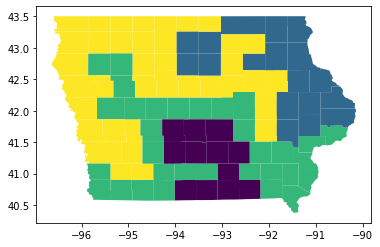

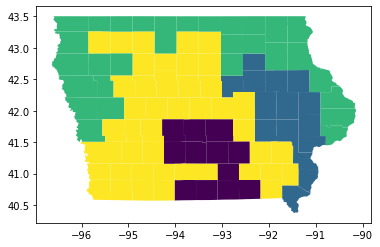

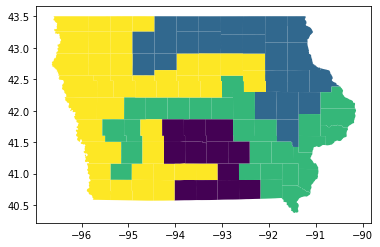

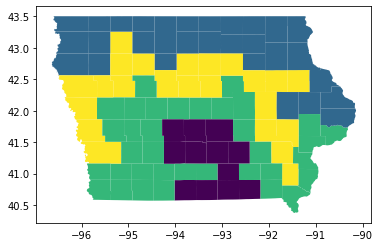

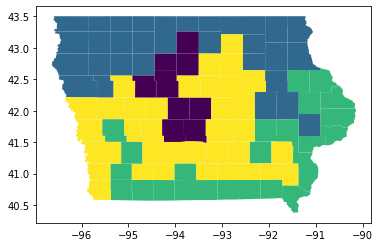

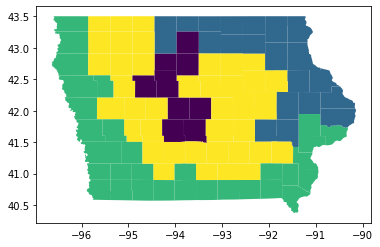

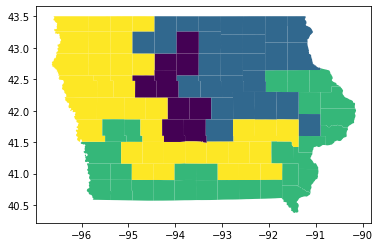

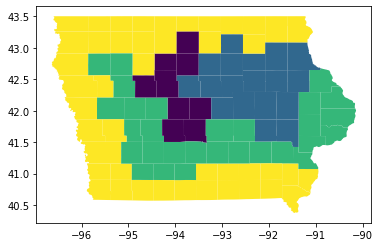

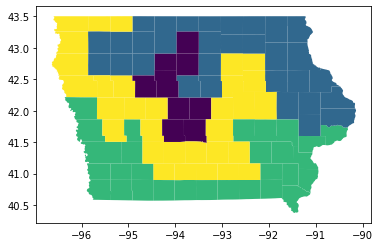

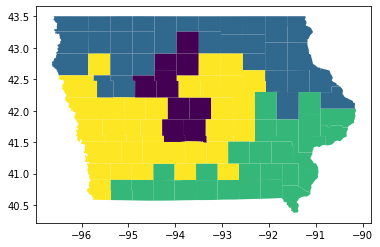

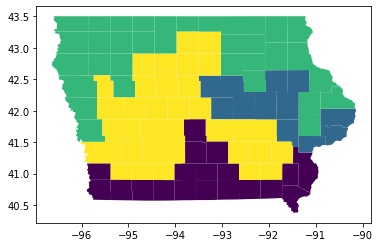

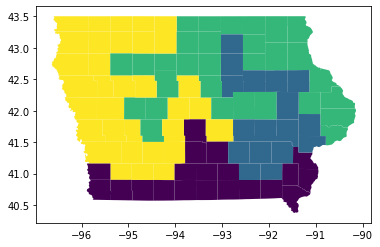

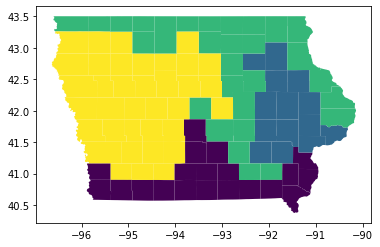

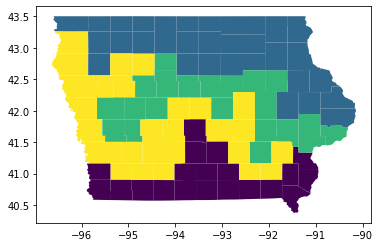

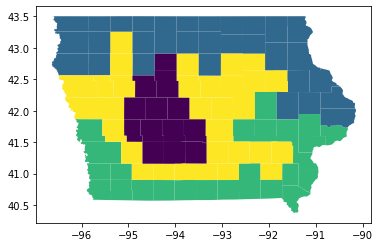

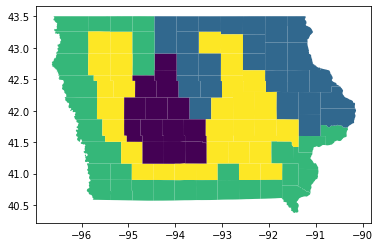

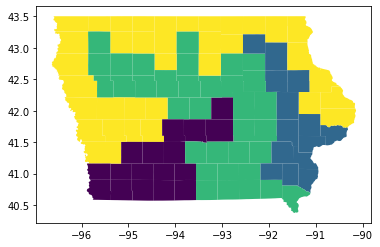

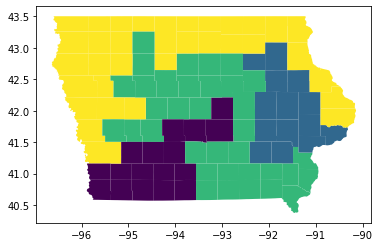

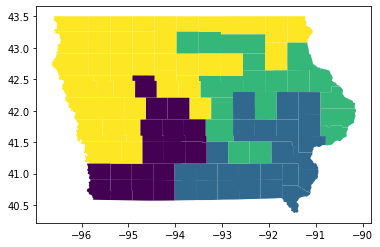

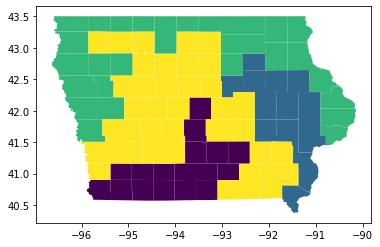

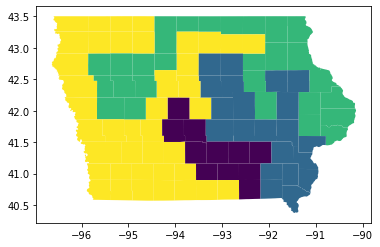

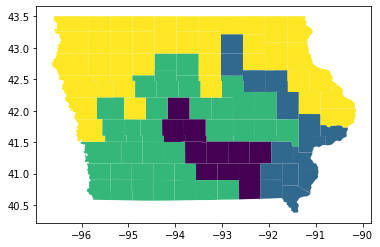

In [9]:
# code to find possibly many plans
for first_district in first_districts:
    
    nondistrict = [ i for i in G.nodes if i not in first_district ]
    G2 = G.subgraph(nondistrict)
    G2._root = None
    G2._size = 1
    G2._k = 3
    G2._L = G._L
    G2._U = G._U
    second_districts = enumerate_top_districts( G2, obj_type=obj_type, enumeration_limit=10 )
    
    for second_district in second_districts:
        
        nondistrict2 = [ i for i in G.nodes if i not in first_district+second_district ]
        G3 = G.subgraph(nondistrict2)
        G3._root = None
        G3._size = 1
        G3._k = 2
        G3._L = G._L
        G3._U = G._U
        third_districts = enumerate_top_districts( G3, obj_type=obj_type, enumeration_limit=10 )

        for third_district in third_districts:

            fourth_district = [ i for i in G.nodes if i not in first_district+second_district+third_district ]
            plan = [ first_district, second_district, third_district, fourth_district ]
            draw_plan( filepath, filename, G, plan )